In [2]:
#!pip install yfinance
!apt-get update -qq
!apt-get install -qq fonts-nanum

# matplotlib에 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fm.fontManager.addfont(font_path)  # 나눔고딕 폰트를 추가
# plt.rc('font', family='NanumGothic')  # 폰트 적용


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [4]:
# !pip install yfinance
# !pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------- -------------------------------- 0.5/3.0 MB 5.6 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 5.9 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 5.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------- ----------------------------- 1.0/3.8 MB 5.0 MB/s eta 0:00:01
   --------------------- ------------------ 2.1/3.8 MB 5.3 MB/s eta 0:00:01
   -------------------------------- ------- 3.1/3.8 MB 5.3 MB/s et

In [5]:

import yfinance as yf
import pandas as pd

import numpy as np
import statsmodels.api as sm

# S&P 500 종목 리스트 가져오기 (위키피디아 데이터 활용)
# pd.read_html() 함수는 웹페이지에 있는 HTML 테이블을 DataFrame으로 변환합니다.
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# 시가총액 정보를 추가하기 위해 티커(symbol) 리스트를 추출합니다.
tickers = sp500['Symbol'].tolist()

# 각 종목의 시가총액(Market Cap)을 가져오기 위한 함수
def get_market_cap(ticker):
    stock = yf.Ticker(ticker)
    try:
        market_cap = stock.info['marketCap']  # 시가총액
    except KeyError:
        market_cap = None
    return market_cap

# 각 종목의 시가총액을 sp500 데이터프레임에 추가합니다.
sp500['Market Cap'] = sp500['Symbol'].apply(get_market_cap)

# 섹터별로 시가총액 상위 4개 종목 선택
top_by_sector = sp500.groupby('GICS Sector').apply(lambda x: x.nlargest(4, 'Market Cap'))

# 섹터별로 시가총액 상위 종목들 출력
print(top_by_sector[['Symbol', 'Security', 'Market Cap']])

C:\Users\eujin\AppData\Local\Temp\ipykernel_6724\978547801.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_by_sector = sp500.groupby('GICS Sector').apply(lambda x: x.nlargest(4, 'Market Cap'))


                           Symbol                 Security    Market Cap
GICS Sector                                                             
Communication Services 19   GOOGL  Alphabet Inc. (Class A)  1.999262e+12
                       20    GOOG  Alphabet Inc. (Class C)  1.999132e+12
                       313   META           Meta Platforms  1.493884e+12
                       335   NFLX                  Netflix  3.121875e+11
Consumer Discretionary 22    AMZN                   Amazon  1.943470e+12
                       444   TSLA              Tesla, Inc.  7.700679e+11
                       234     HD         Home Depot (The)  4.132794e+11
                       309    MCD               McDonald's  2.179503e+11
Consumer Staples       483    WMT                  Walmart  6.462753e+11
                       130   COST                   Costco  4.027985e+11
                       381     PG         Procter & Gamble  3.977354e+11
                       115     KO  Coca-Cola Compan

In [8]:
sp500.to_csv("./snp500.csv")

[*********************100%***********************]  4 of 4 completed


상관관계 매트릭스:
Ticker      AAPL      AVGO      MSFT      NVDA
Ticker                                        
AAPL    1.000000  0.818889  0.733524  0.695443
AVGO    0.818889  1.000000  0.658584  0.694123
MSFT    0.733524  0.658584  1.000000  0.947690
NVDA    0.695443  0.694123  0.947690  1.000000
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     583.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           4.62e-86
Time:                        16:44:58   Log-Likelihood:                -2250.6
No. Observations:                 503   AIC:                             4505.
Df Residuals:                     501   BIC:                             4514.
Df Model:                           1                                      

C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\eujin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site

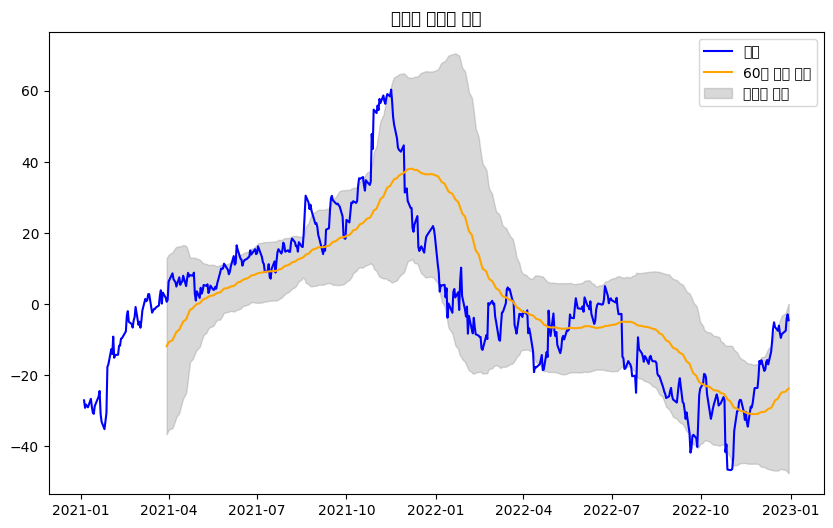

In [9]:
# -------- 새로 추가된 코드 (상관관계 및 OLS 회귀 분석) --------

# 각 섹터의 종목 데이터를 가져오기 위한 함수
def get_sector_data(tickers, start_date="2021-01-01", end_date="2023-01-01"):
    # 데이터 수집 (Adjusted Close 가격을 가져옵니다)
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# 예를 들어, 'Information Technology' 섹터에서 상위 4종목 데이터 가져오기
it_sector_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()
it_data = get_sector_data(it_sector_tickers)

# 종목 간 상관관계 계산
correlation_matrix = it_data.corr()
print("상관관계 매트릭스:")
print(correlation_matrix)

# OLS 회귀 분석 예시 (AAPL과 MSFT를 사용하여 진행)
x = it_data['AAPL']
y = it_data['MSFT']

# OLS 회귀분석 모델 설정
x = sm.add_constant(x)  # 상수항 추가
ols_model = sm.OLS(y, x).fit()

# 회귀 결과 및 잔차 확인
print(ols_model.summary())
residuals = ols_model.resid  # 잔차

# 4. 60일 이동 평균과 표준편차 계산
moving_avg = residuals.rolling(window=60).mean()
moving_std = residuals.rolling(window=60).std()

# 5. 볼린저 밴드 계산 (±2 표준편차)
upper_band = moving_avg + (2 * moving_std)
lower_band = moving_avg - (2 * moving_std)

# 6. 볼린저 밴드와 잔차 시각화
plt.figure(figsize=(10,6))
plt.plot(residuals, label='잔차', color='blue')
plt.plot(moving_avg, label='60일 이동 평균', color='orange')
plt.fill_between(residuals.index, lower_band, upper_band, color='gray', alpha=0.3, label='볼린저 밴드')
plt.legend()
plt.title('잔차와 볼린저 밴드')
plt.show()

# 7. 매매 규칙
# 잔차가 상단을 넘으면 매도, 하단을 넘으면 매수
entry_signals = (residuals > upper_band) | (residuals < lower_band)
exit_signals = residuals.rolling(window=60).mean().shift(1)  # 이동평균선이 교차할 때 청산


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: AAPL and NVDA


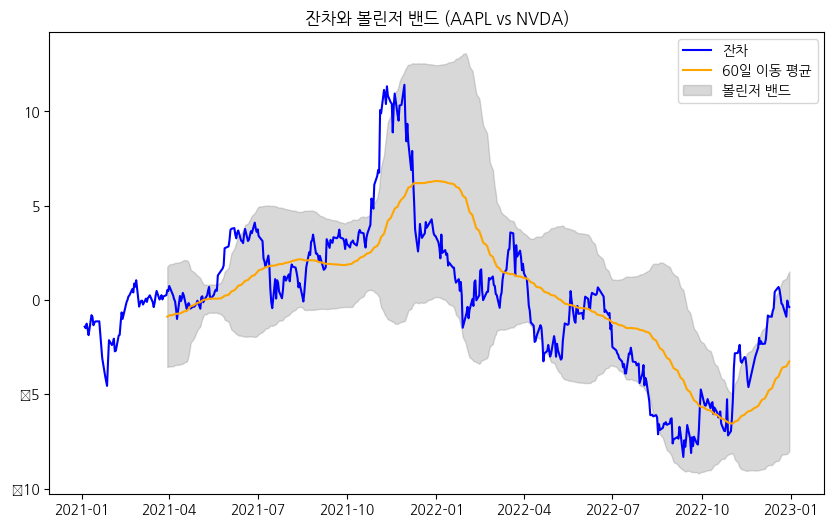


Analyzing Pair: AAPL and MSFT


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


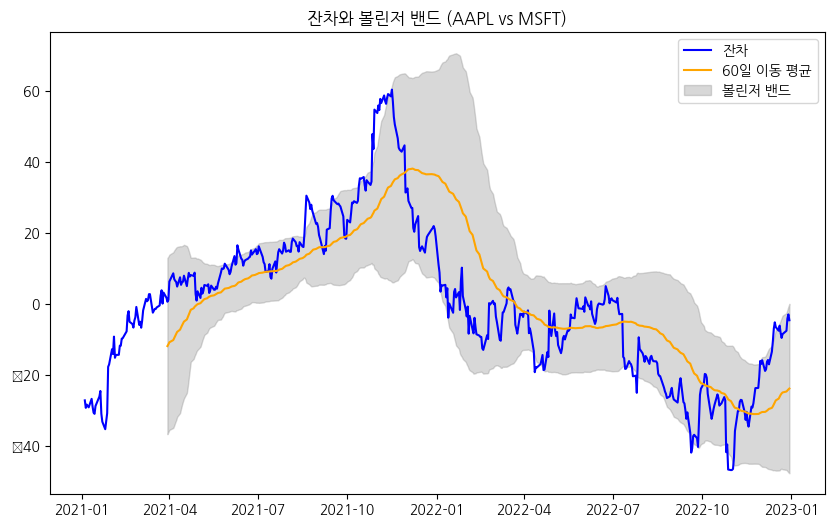


Analyzing Pair: AAPL and AVGO


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


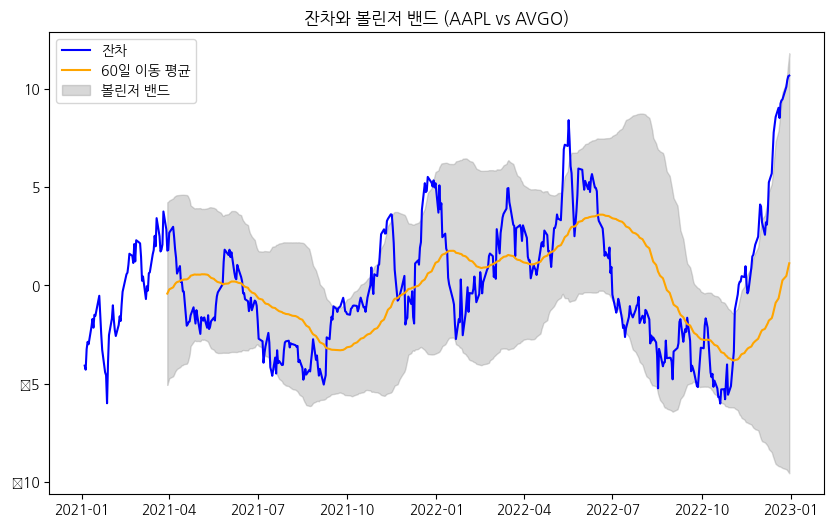


Analyzing Pair: NVDA and MSFT


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


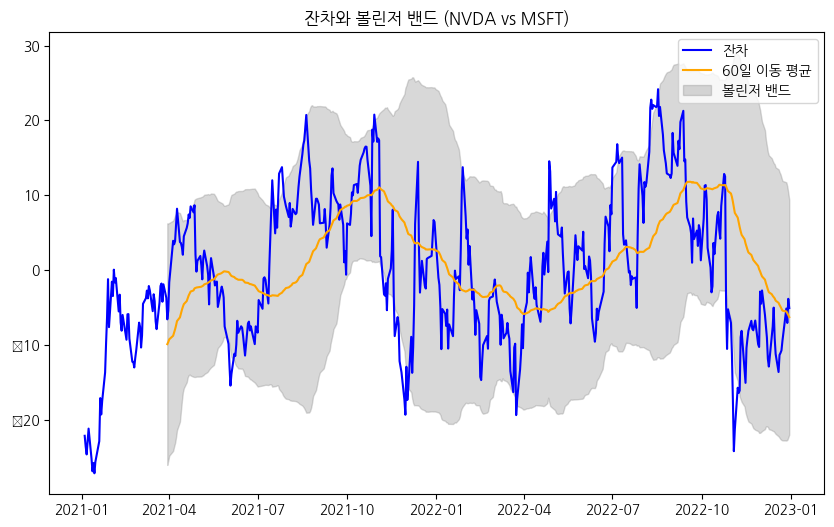


Analyzing Pair: NVDA and AVGO


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


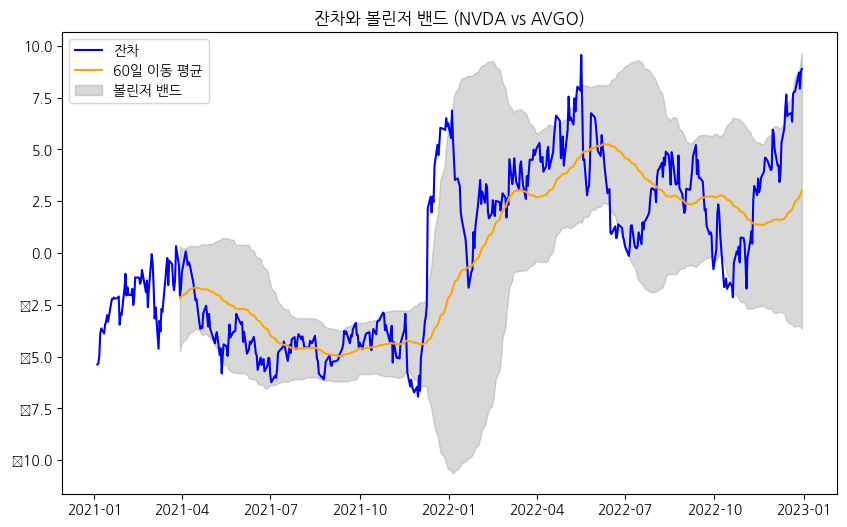


Analyzing Pair: MSFT and AVGO


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


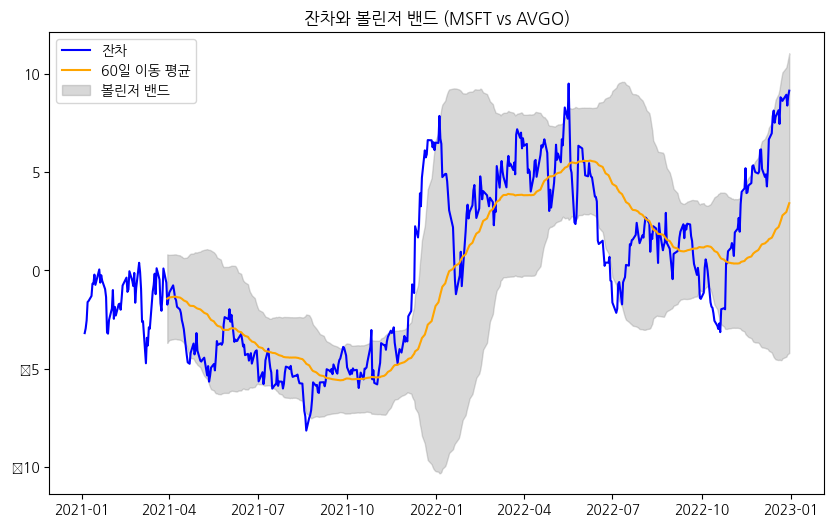

In [64]:
import itertools

# 각 섹터의 모든 페어에 대해 OLS 회귀 분석 및 볼린저 밴드 계산
def analyze_sector_pairs(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    # 데이터 수집
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)

    # 모든 종목 쌍(페어) 구성 (itertools를 사용해 두 종목씩 페어를 만듦)
    pairs = list(itertools.combinations(sector_tickers, 2))

    for pair in pairs:
        x_ticker, y_ticker = pair
        print(f"\nAnalyzing Pair: {x_ticker} and {y_ticker}")

        # OLS 회귀 분석
        x = data[x_ticker]
        y = data[y_ticker]
        x = sm.add_constant(x)  # 상수항 추가
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid  # 잔차 계산

        # 60일 이동 평균과 표준편차 계산
        moving_avg = residuals.rolling(window=60).mean()
        moving_std = residuals.rolling(window=60).std()

        # 볼린저 밴드 계산
        upper_band = moving_avg + (2 * moving_std)
        lower_band = moving_avg - (2 * moving_std)

        # 볼린저 밴드와 잔차 시각화
        plt.figure(figsize=(10,6))
        plt.plot(residuals, label='잔차', color='blue')
        plt.plot(moving_avg, label='60일 이동 평균', color='orange')
        plt.fill_between(residuals.index, lower_band, upper_band, color='gray', alpha=0.3, label='볼린저 밴드')
        plt.legend()
        plt.title(f'잔차와 볼린저 밴드 ({x_ticker} vs {y_ticker})')
        plt.show()

# 1. Information Technology 섹터의 모든 페어 분석
it_sector_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()
analyze_sector_pairs(it_sector_tickers)


In [65]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.05:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Information Technology 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Information Technology']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: AAPL and NVDA - 잔차 표준편차: 3.8089099360281455, ADF p-value: 0.31719294296578027
Pair: AAPL and MSFT - 잔차 표준편차: 21.250256708547077, ADF p-value: 0.3791726882562289
Pair: AAPL and AVGO - 잔차 표준편차: 3.2334394379172604, ADF p-value: 0.34841755214189807
Pair: NVDA and MSFT - 잔차 표준편차: 9.979773024954717, ADF p-value: 0.00015040500351321556
Pair: NVDA and AVGO - 잔차 표준편차: 4.055409284272187, ADF p-value: 0.4224986197465629
Pair: MSFT and AVGO - 잔차 표준편차: 4.239351418828067, ADF p-value: 0.5617784763236565
가장 안정적인 페어: ('NVDA', 'MSFT')


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: XOM and CVX


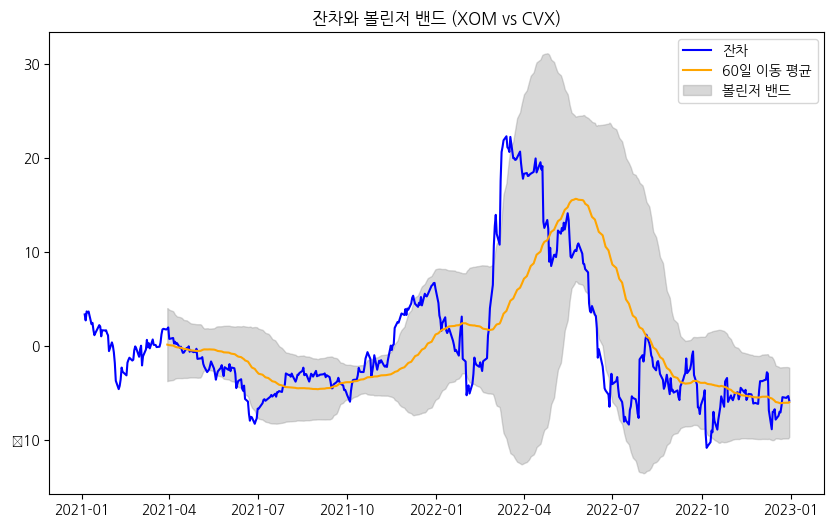


Analyzing Pair: XOM and COP


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


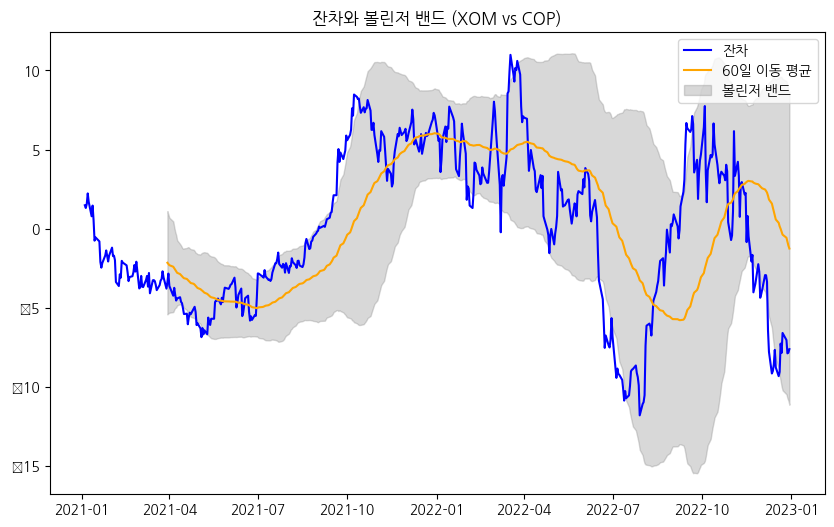


Analyzing Pair: XOM and EOG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


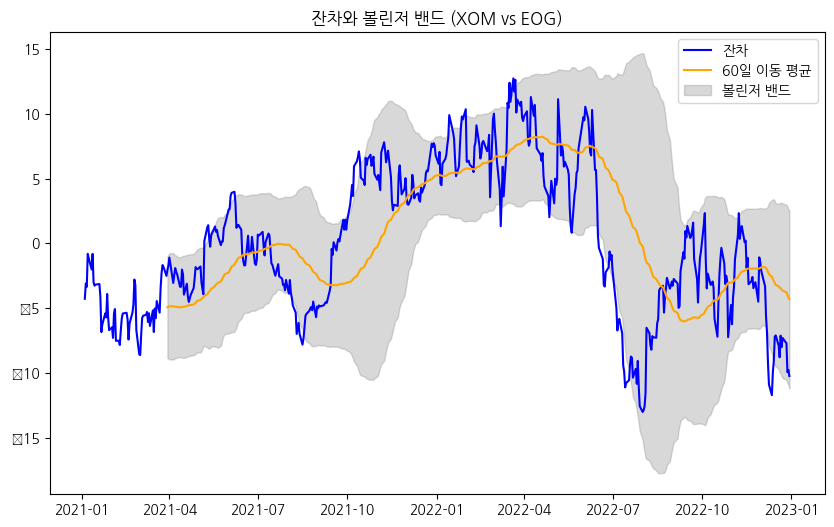


Analyzing Pair: CVX and COP


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


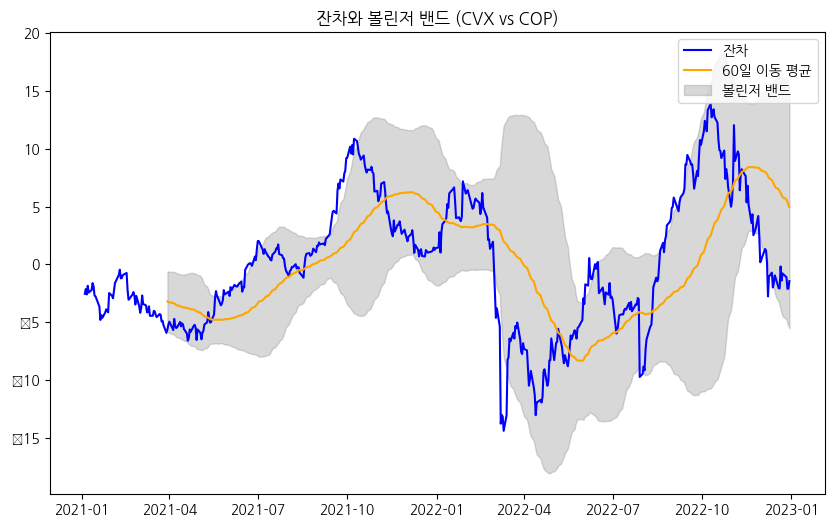


Analyzing Pair: CVX and EOG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


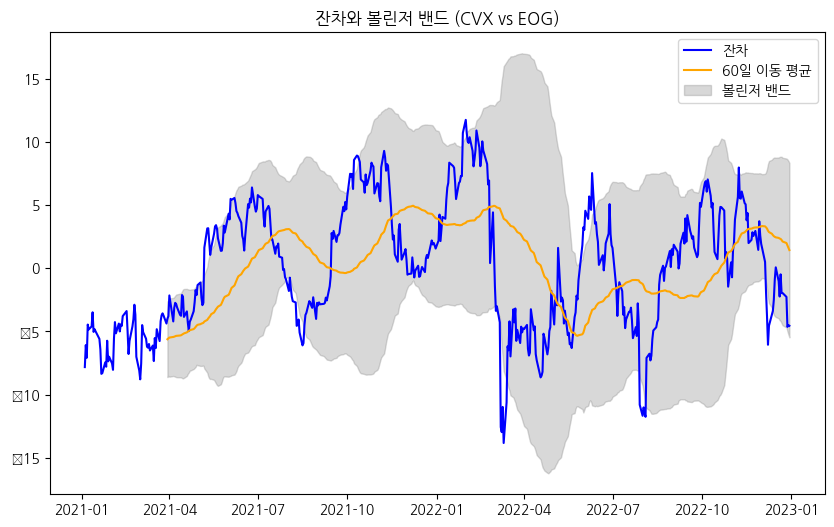


Analyzing Pair: COP and EOG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


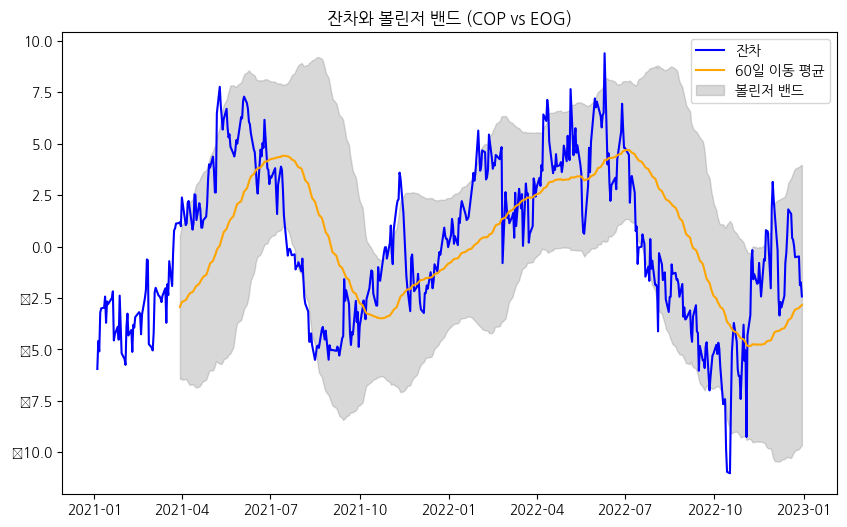

In [66]:
# 2. Energy 섹터의 모든 페어 분석
energy_sector_tickers = top_by_sector.loc['Energy']['Symbol'].tolist()
analyze_sector_pairs(energy_sector_tickers)


In [67]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.05:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Energy 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Energy']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: XOM and CVX - 잔차 표준편차: 6.91605089662299, ADF p-value: 0.2510214455776475
Pair: XOM and COP - 잔차 표준편차: 4.988583066065454, ADF p-value: 0.30326385292763025
Pair: XOM and EOG - 잔차 표준편차: 5.704429559781784, ADF p-value: 0.13022896178428955
Pair: CVX and COP - 잔차 표준편차: 5.641685847231477, ADF p-value: 0.2603660801010764
Pair: CVX and EOG - 잔차 표준편차: 4.9999611733065015, ADF p-value: 0.012416305063804383
Pair: COP and EOG - 잔차 표준편차: 3.7392091362658886, ADF p-value: 0.13729423897683296
가장 안정적인 페어: ('CVX', 'EOG')


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: AMZN and TSLA


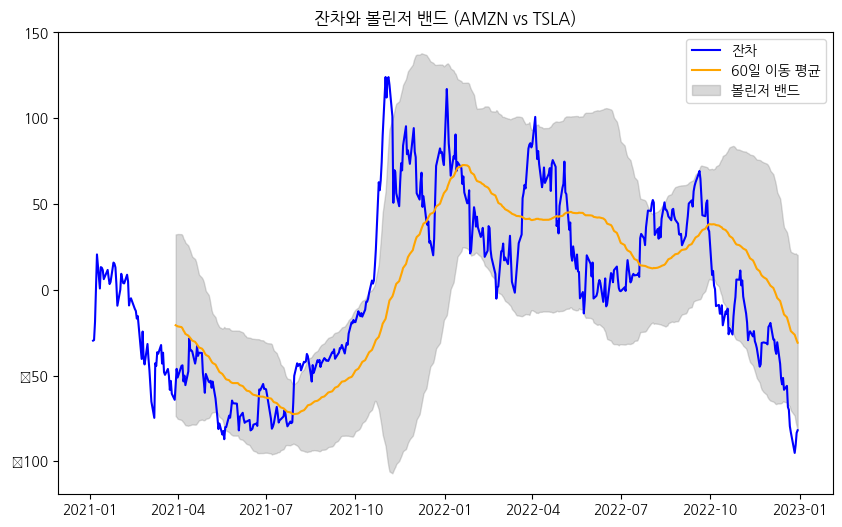


Analyzing Pair: AMZN and HD


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


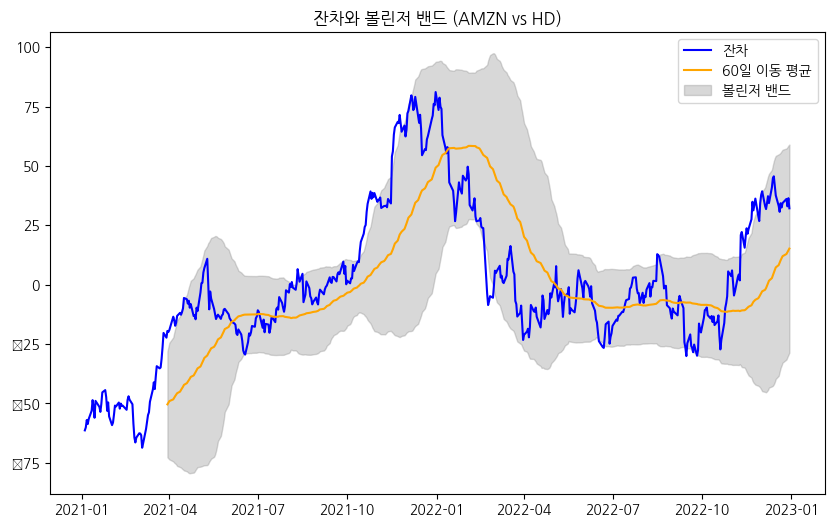


Analyzing Pair: AMZN and MCD


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


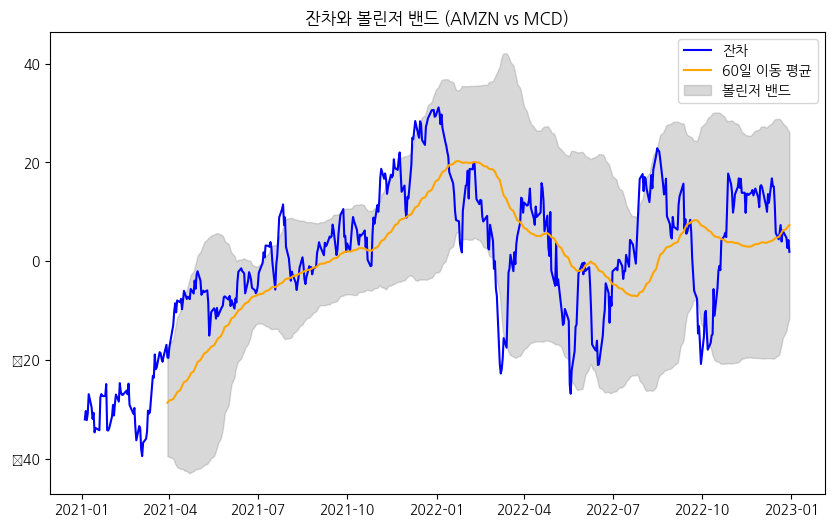


Analyzing Pair: TSLA and HD


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


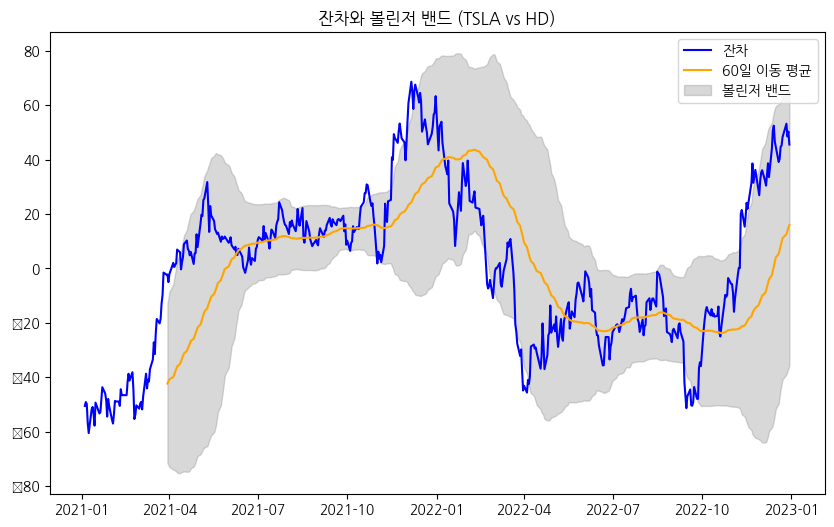


Analyzing Pair: TSLA and MCD


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


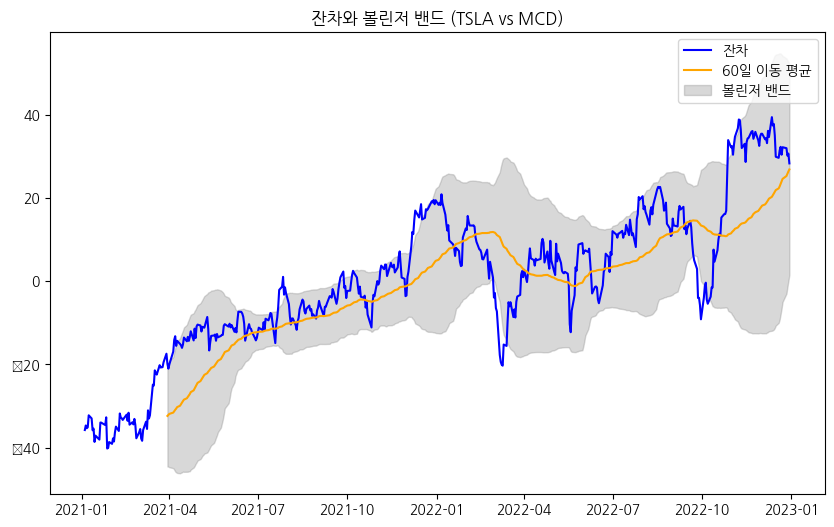


Analyzing Pair: HD and MCD


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


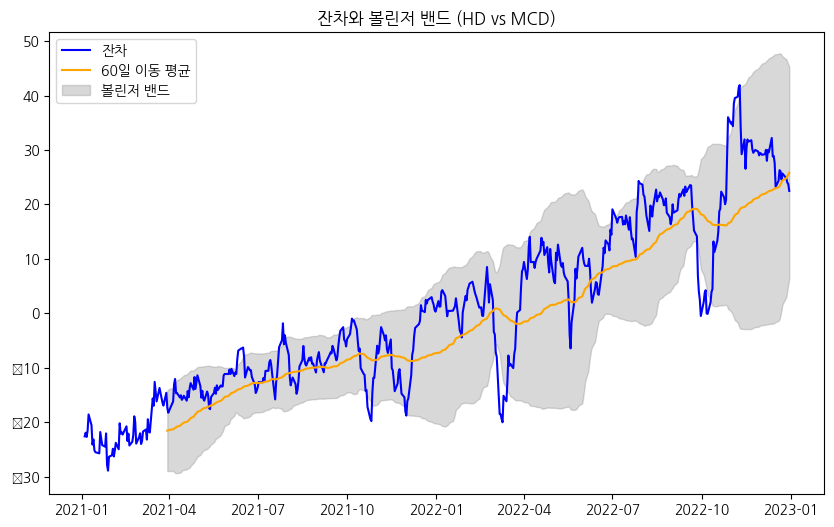

In [68]:
# 3. Consumer Discretionary 섹터의 모든 페어 분석
consumer_discretionary_tickers = top_by_sector.loc['Consumer Discretionary']['Symbol'].tolist()
analyze_sector_pairs(consumer_discretionary_tickers)

In [86]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.1:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Consumer Discretionary 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Consumer Discretionary']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: AMZN and TSLA - 잔차 표준편차: 50.11148791702545, ADF p-value: 0.3814015965018349
Pair: AMZN and HD - 잔차 표준편차: 31.383650156248354, ADF p-value: 0.2718179750502373
Pair: AMZN and MCD - 잔차 표준편차: 15.32465227533703, ADF p-value: 0.06334267640080583
Pair: TSLA and HD - 잔차 표준편차: 29.278744532256972, ADF p-value: 0.16874413351888318
Pair: TSLA and MCD - 잔차 표준편차: 17.906137771199848, ADF p-value: 0.38035808158568635
Pair: HD and MCD - 잔차 표준편차: 15.999167614166106, ADF p-value: 0.47148590992418155
가장 안정적인 페어: ('AMZN', 'MCD')


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: LLY and UNH


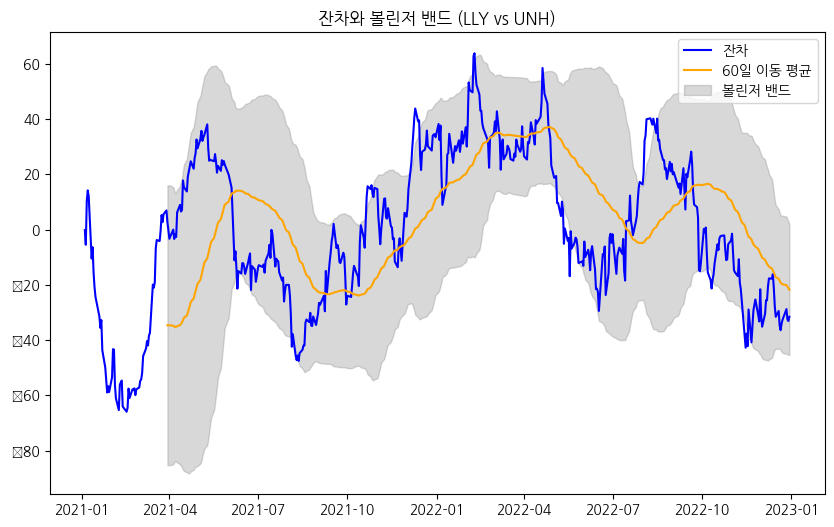


Analyzing Pair: LLY and JNJ


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


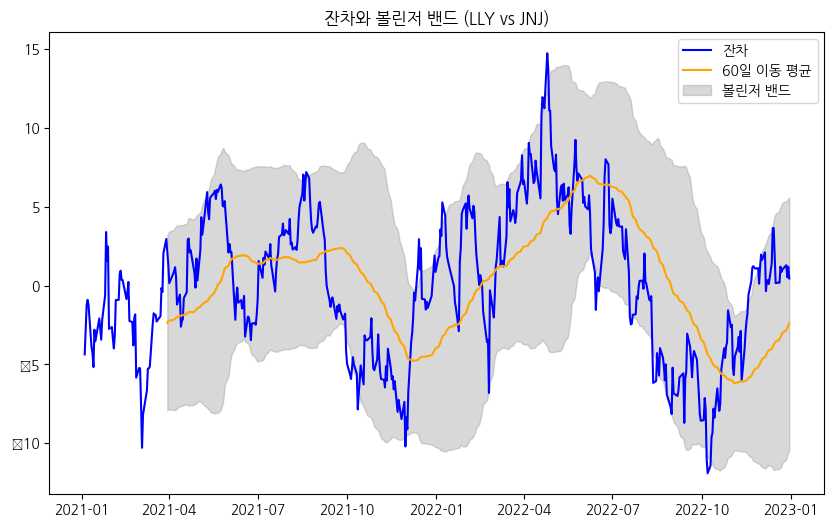


Analyzing Pair: LLY and ABBV


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


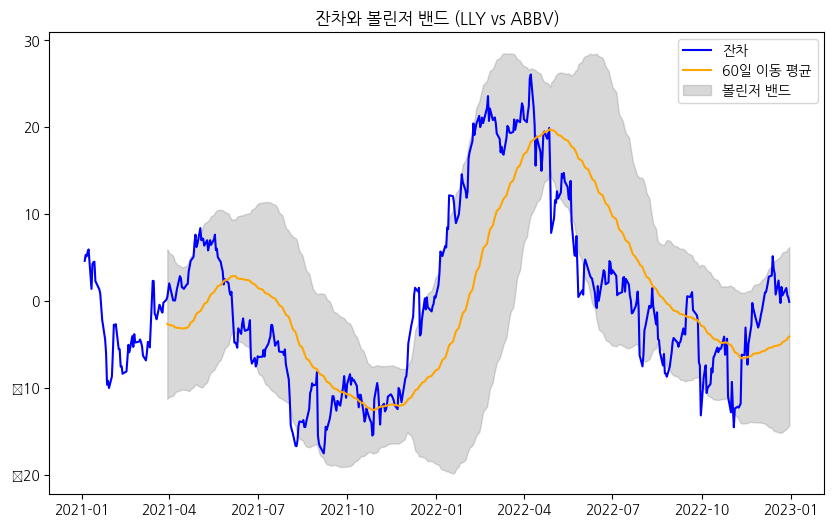


Analyzing Pair: UNH and JNJ


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


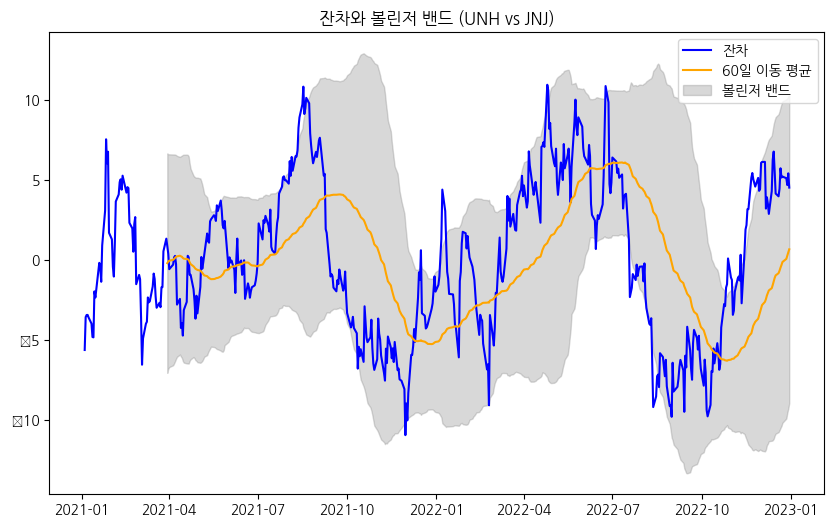


Analyzing Pair: UNH and ABBV


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


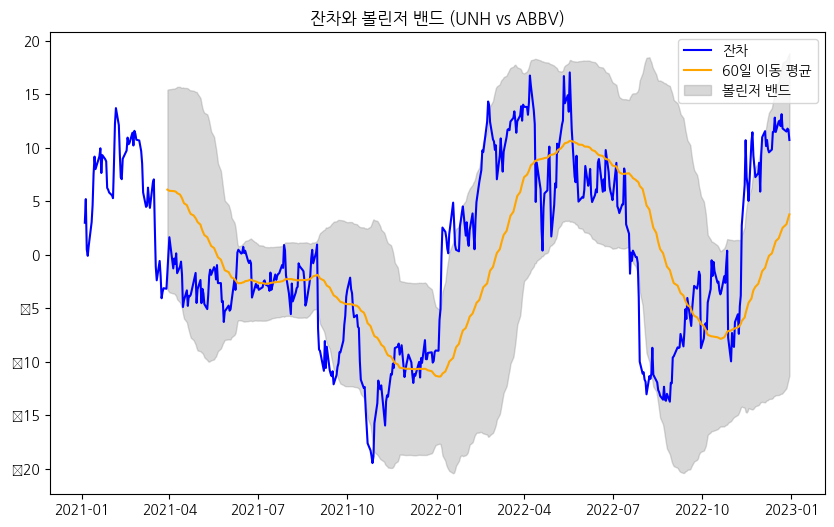


Analyzing Pair: JNJ and ABBV


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


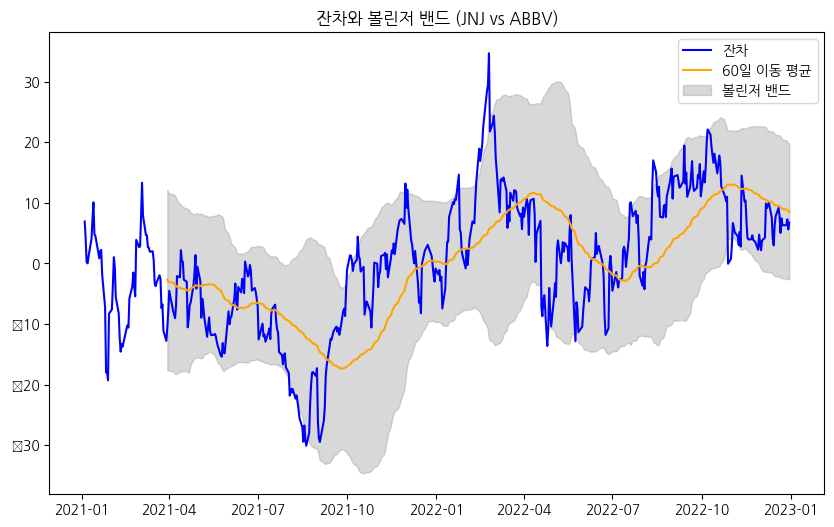

In [70]:
# 4. Health Care 섹터의 모든 페어 분석
health_care_tickers = top_by_sector.loc['Health Care']['Symbol'].tolist()
analyze_sector_pairs(health_care_tickers)

In [71]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.05:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Health Care 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Health Care']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: LLY and UNH - 잔차 표준편차: 27.771391258807423, ADF p-value: 0.2460870589020009
Pair: LLY and JNJ - 잔차 표준편차: 4.619708572490054, ADF p-value: 0.009127527227093837
Pair: LLY and ABBV - 잔차 표준편차: 9.915970566729253, ADF p-value: 0.33371722384495595
Pair: UNH and JNJ - 잔차 표준편차: 4.771903589558174, ADF p-value: 0.013566513869177883
Pair: UNH and ABBV - 잔차 표준편차: 8.203283315135097, ADF p-value: 0.17702102207094328
Pair: JNJ and ABBV - 잔차 표준편차: 10.70401619266614, ADF p-value: 0.01129019683395346
가장 안정적인 페어: ('LLY', 'JNJ')


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: JPM and V


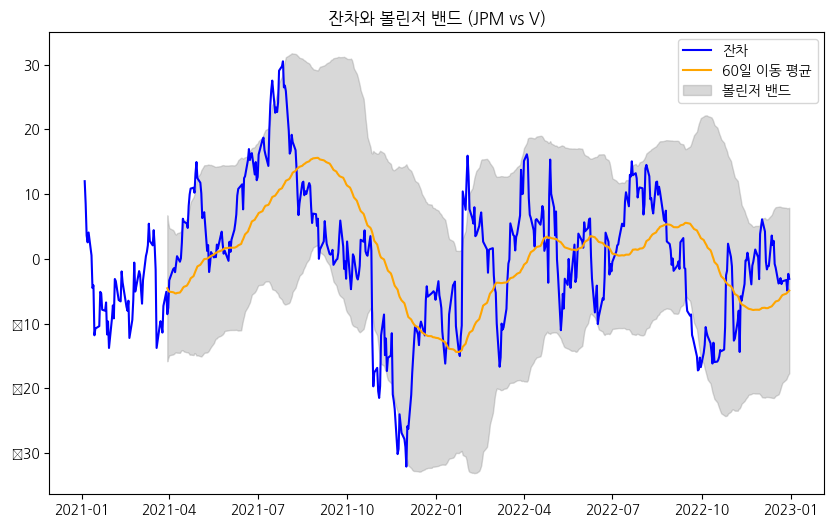


Analyzing Pair: JPM and MA


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


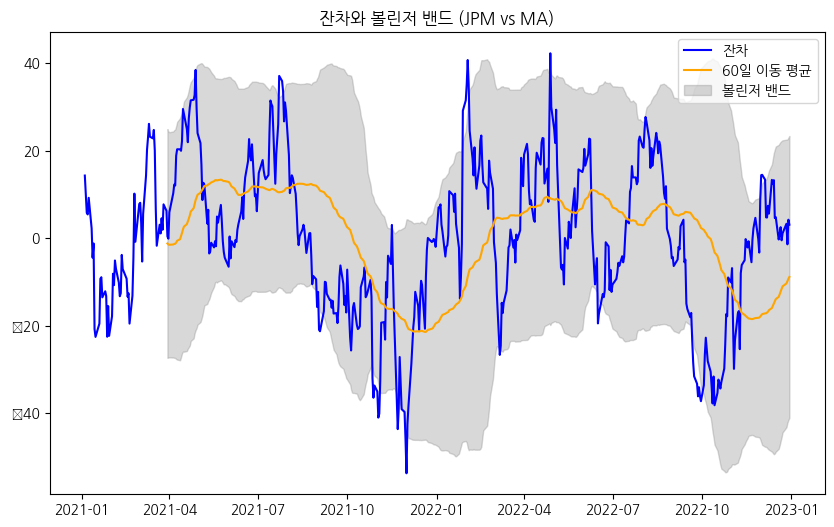


Analyzing Pair: JPM and BAC


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


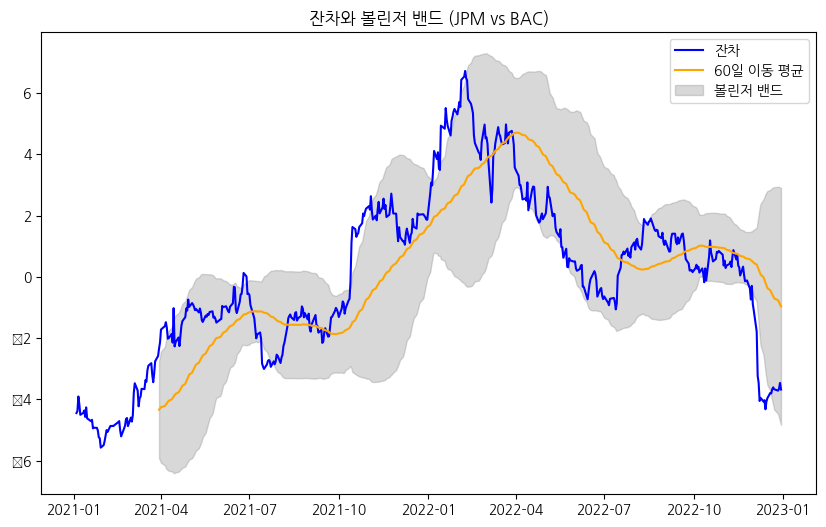


Analyzing Pair: V and MA


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


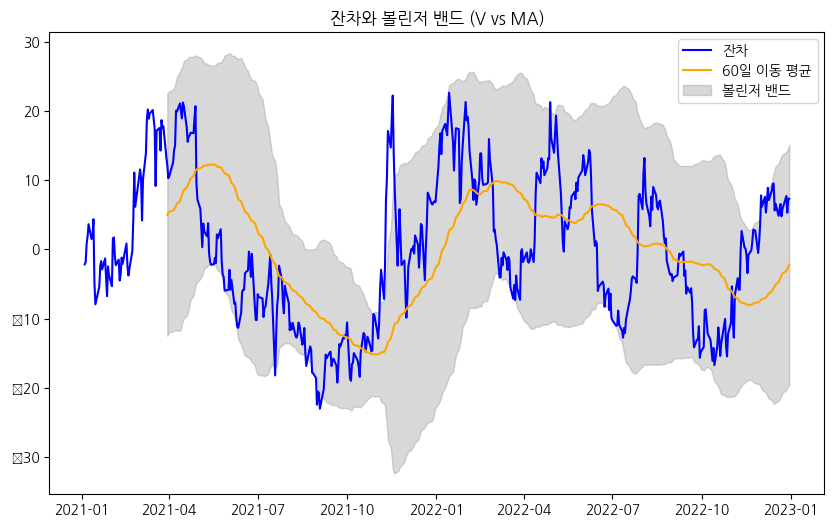


Analyzing Pair: V and BAC


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


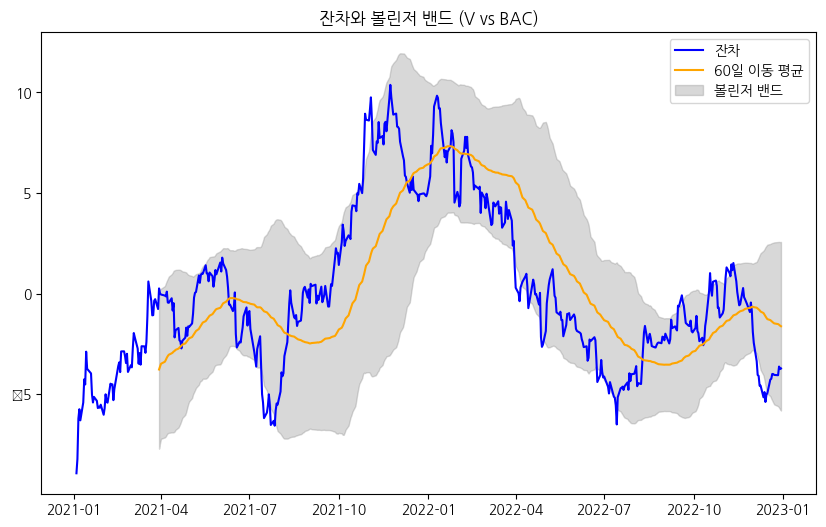


Analyzing Pair: MA and BAC


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


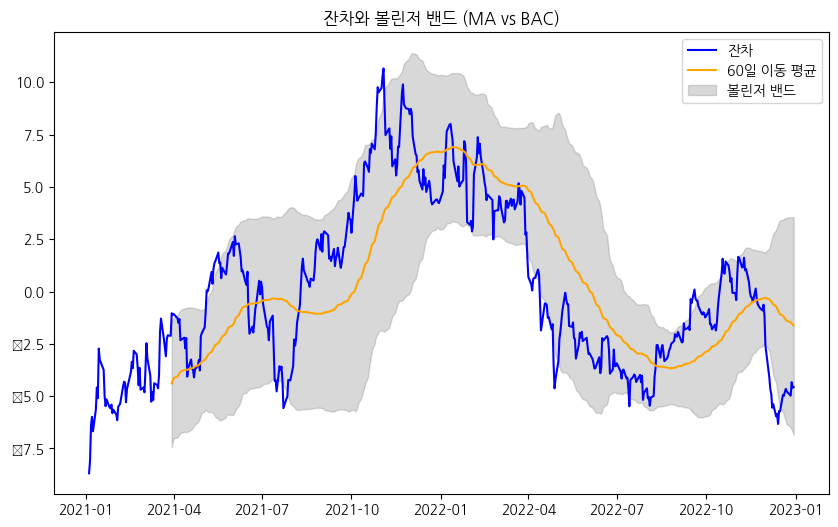

In [72]:
# 5. Financials 섹터의 모든 페어 분석
financials_tickers = top_by_sector.loc['Financials']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers)


In [73]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.05:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Financials 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Financials']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: JPM and V - 잔차 표준편차: 10.423993709751324, ADF p-value: 0.006196580992343184
Pair: JPM and MA - 잔차 표준편차: 17.567880073285384, ADF p-value: 0.0011200987693991097
Pair: JPM and BAC - 잔차 표준편차: 2.702400402264467, ADF p-value: 0.548955982234223
Pair: V and MA - 잔차 표준편차: 10.550601984006212, ADF p-value: 0.060390487945949624
Pair: V and BAC - 잔차 표준편차: 4.031655365108824, ADF p-value: 0.16168304433134084
Pair: MA and BAC - 잔차 표준편차: 4.047085065767883, ADF p-value: 0.16293487081645497
가장 안정적인 페어: ('JPM', 'V')


[*********************100%***********************]  4 of 4 completed



Analyzing Pair: GOOGL and GOOG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


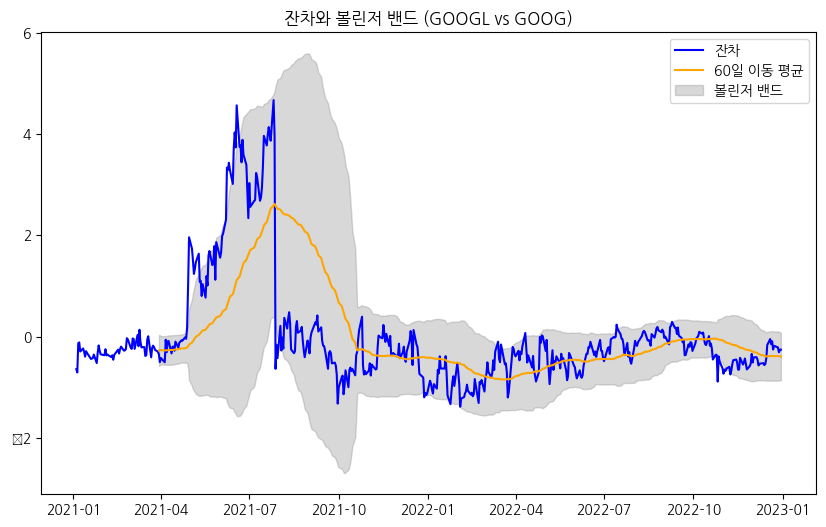


Analyzing Pair: GOOGL and META


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


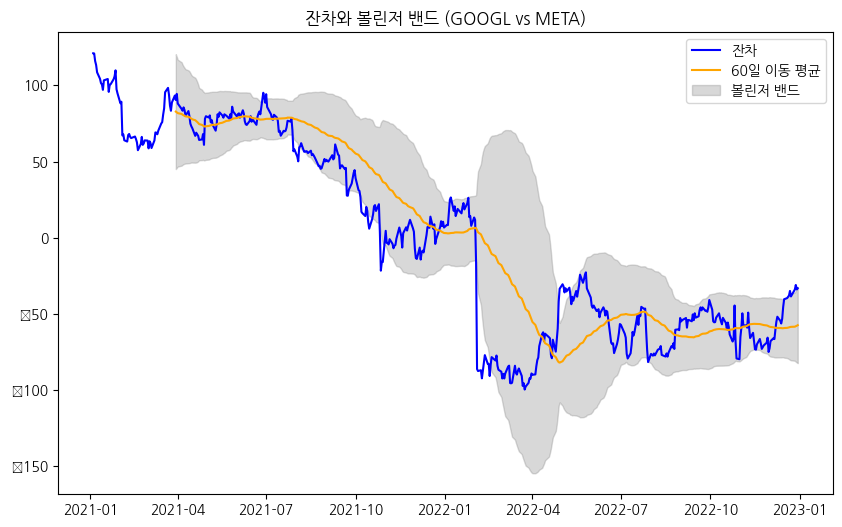


Analyzing Pair: GOOGL and NFLX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


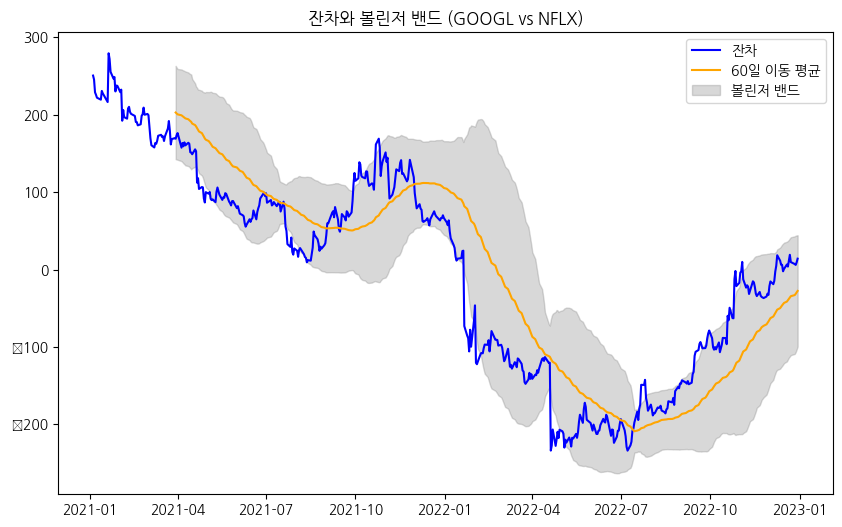


Analyzing Pair: GOOG and META


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


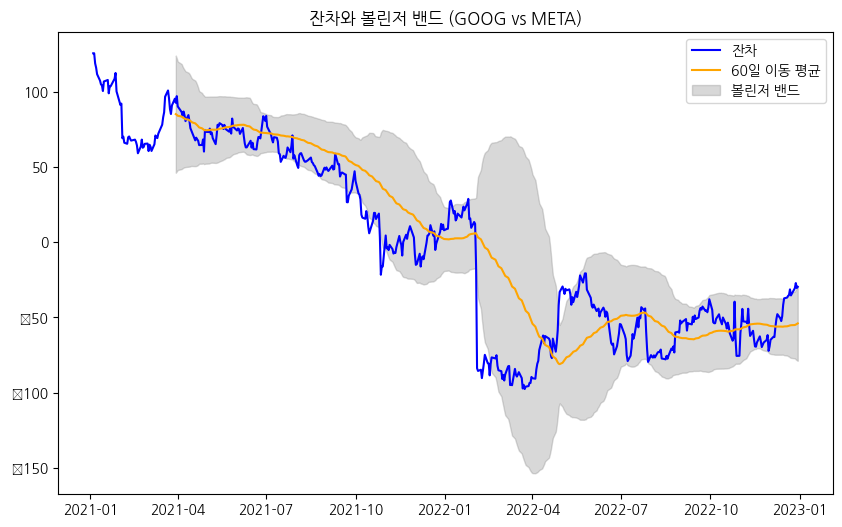


Analyzing Pair: GOOG and NFLX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


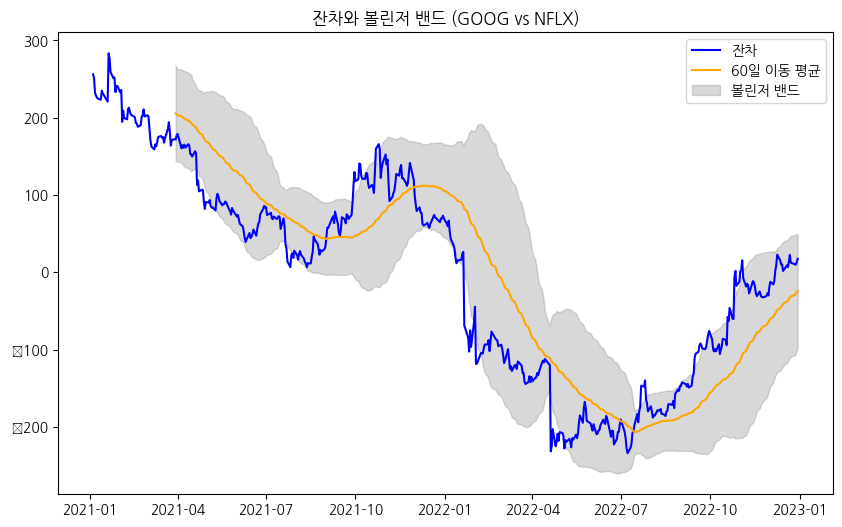


Analyzing Pair: META and NFLX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


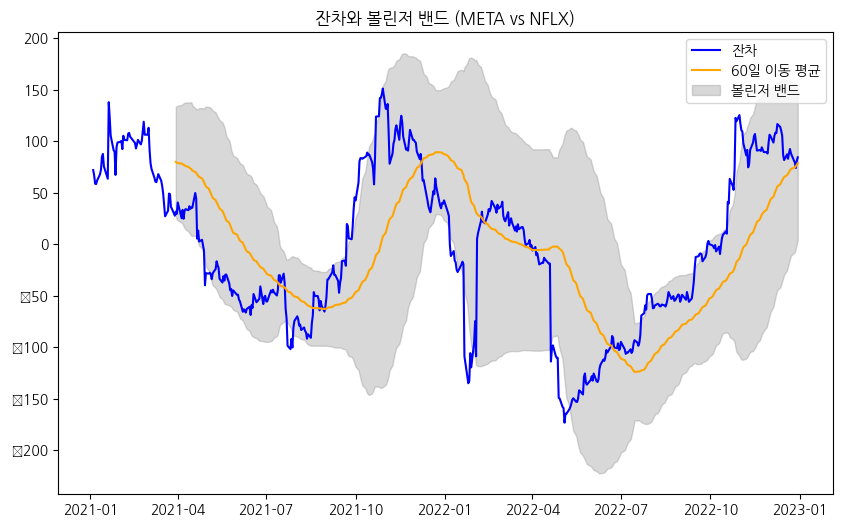

In [74]:
# 6. Communication Services 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Communication Services']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers)


In [75]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.05:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Communication Services 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Communication Services']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: GOOGL and GOOG - 잔차 표준편차: 1.0972302648460628, ADF p-value: 0.03488539528868469
Pair: GOOGL and META - 잔차 표준편차: 63.78476437971236, ADF p-value: 0.3232044596033399
Pair: GOOGL and NFLX - 잔차 표준편차: 135.20385225020385, ADF p-value: 0.4231835043461467
Pair: GOOG and META - 잔차 표준편차: 62.3007848946492, ADF p-value: 0.26944552352348283
Pair: GOOG and NFLX - 잔차 표준편차: 134.29488564815435, ADF p-value: 0.4268824452626419
Pair: META and NFLX - 잔차 표준편차: 77.30235375484584, ADF p-value: 0.3675546100217859
가장 안정적인 페어: ('GOOGL', 'GOOG')


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: WMT and COST


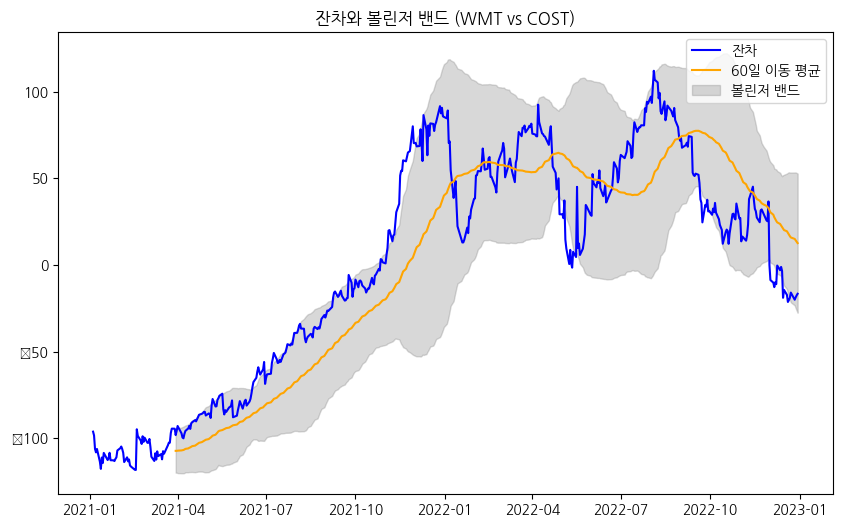


Analyzing Pair: WMT and PG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


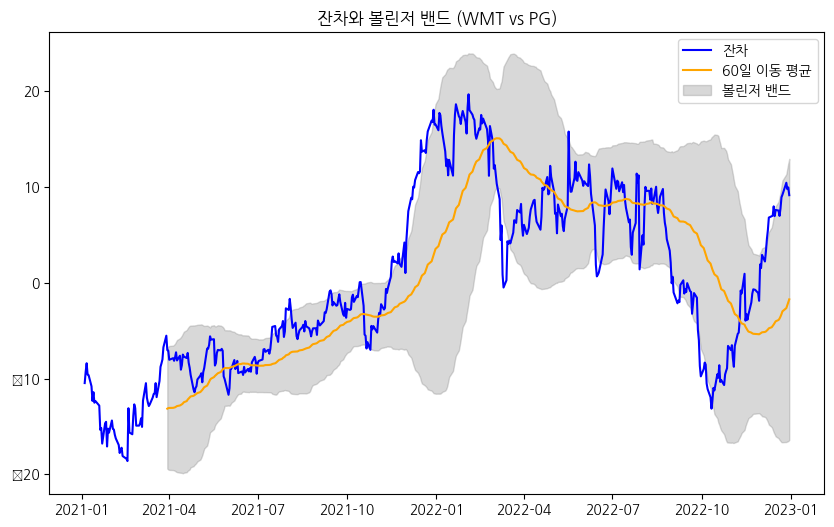


Analyzing Pair: WMT and KO


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


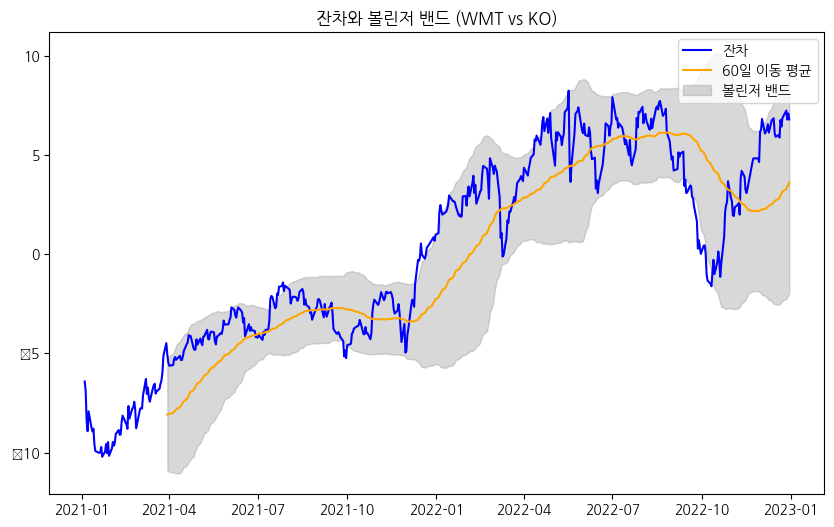


Analyzing Pair: COST and PG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


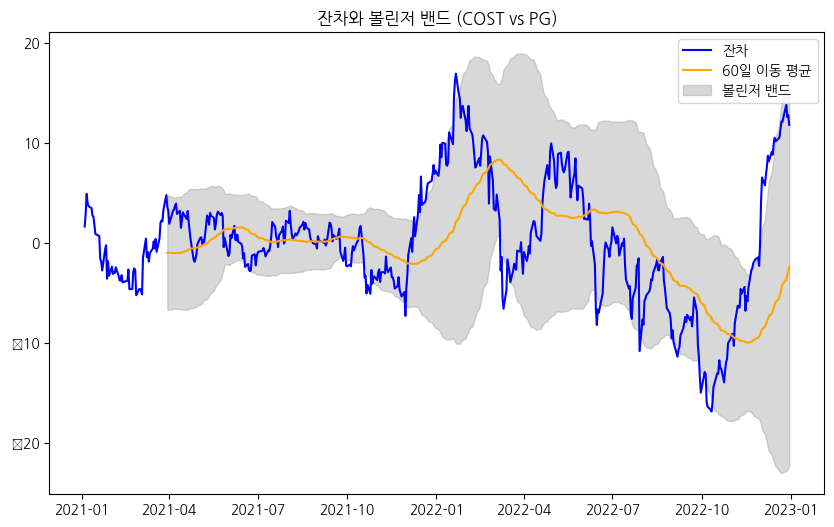


Analyzing Pair: COST and KO


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


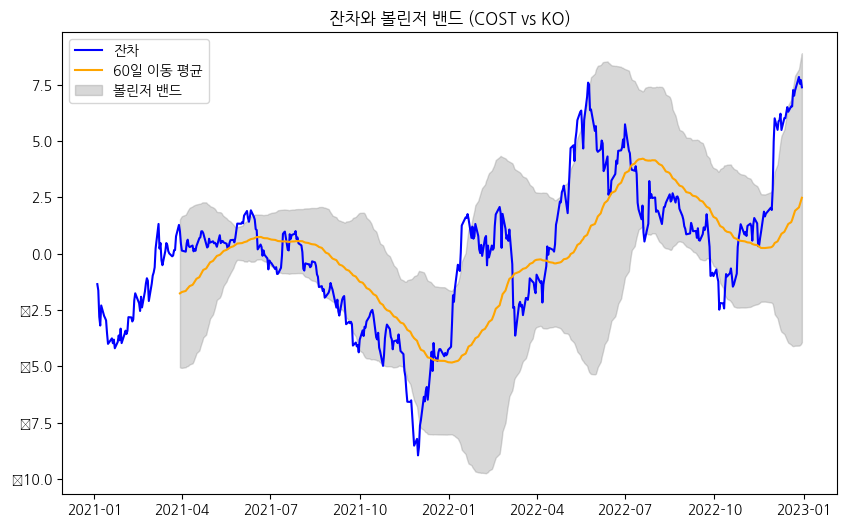


Analyzing Pair: PG and KO


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


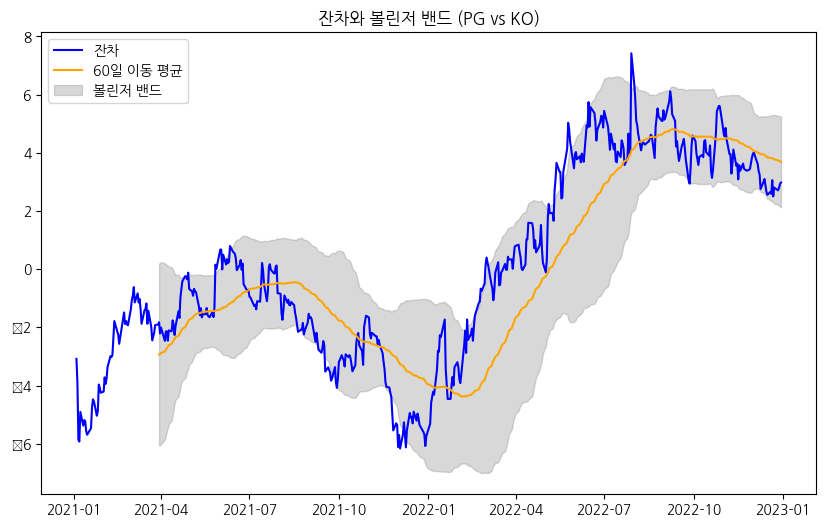

In [76]:
# 7. Consumer Staples 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Consumer Staples']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers)

In [87]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.1:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Consumer Staples 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Consumer Staples']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: WMT and COST - 잔차 표준편차: 65.78043750309025, ADF p-value: 0.3513199380373637
Pair: WMT and PG - 잔차 표준편차: 9.355152461388284, ADF p-value: 0.4877843782770044
Pair: WMT and KO - 잔차 표준편차: 4.9408537116852225, ADF p-value: 0.6640696942044901
Pair: COST and PG - 잔차 표준편차: 5.977297884448737, ADF p-value: 0.18733485988085619
Pair: COST and KO - 잔차 표준편차: 3.066644180405425, ADF p-value: 0.30406181868039506
Pair: PG and KO - 잔차 표준편차: 3.30380999853649, ADF p-value: 0.5504785149311793
가장 안정적인 페어: None


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: GE and CAT


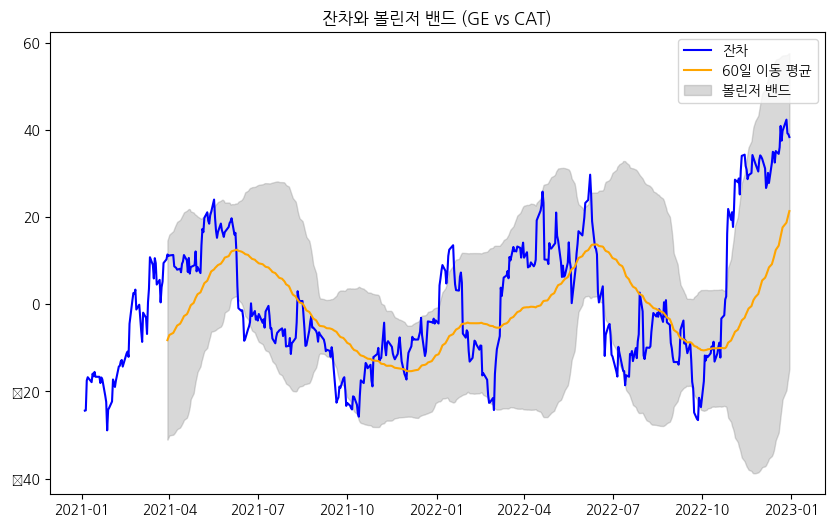


Analyzing Pair: GE and RTX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


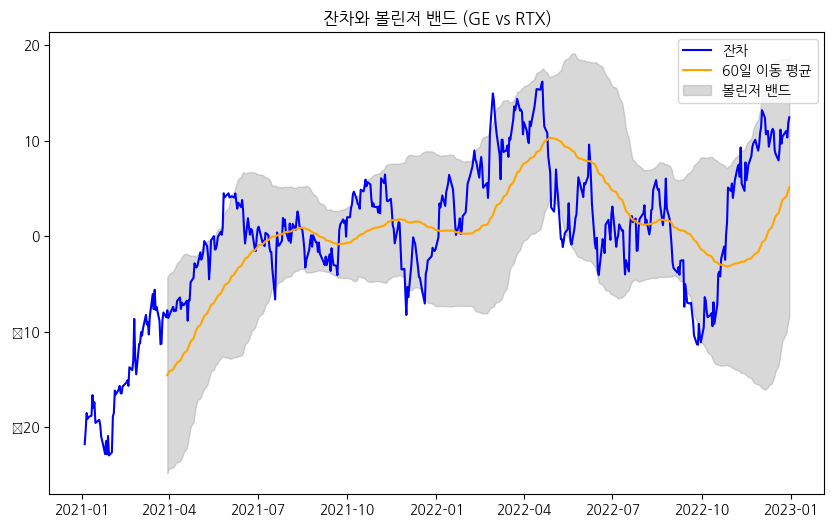


Analyzing Pair: GE and UBER


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


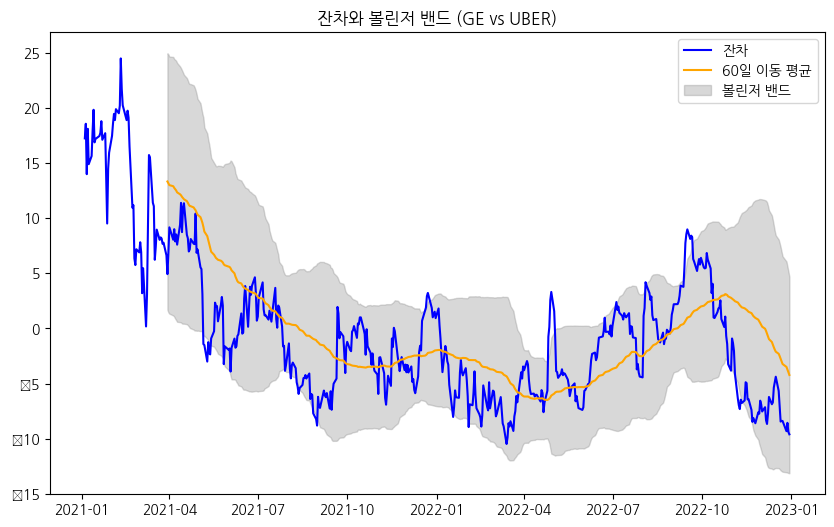


Analyzing Pair: CAT and RTX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


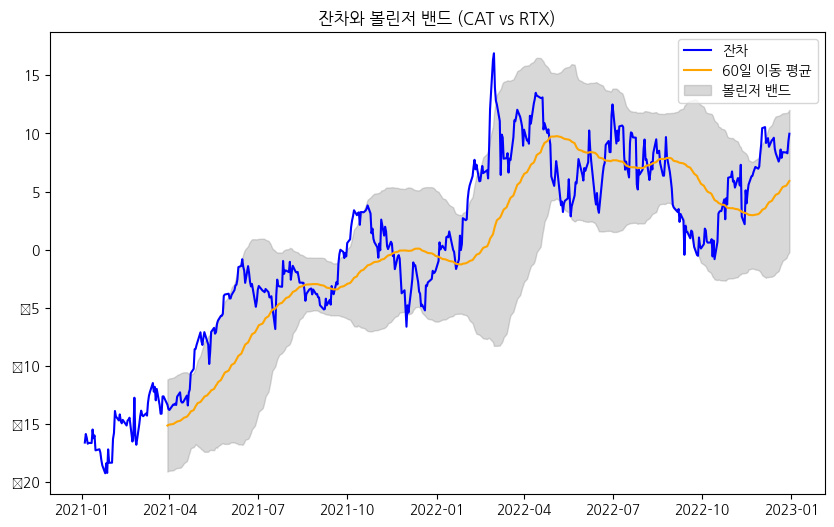


Analyzing Pair: CAT and UBER


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


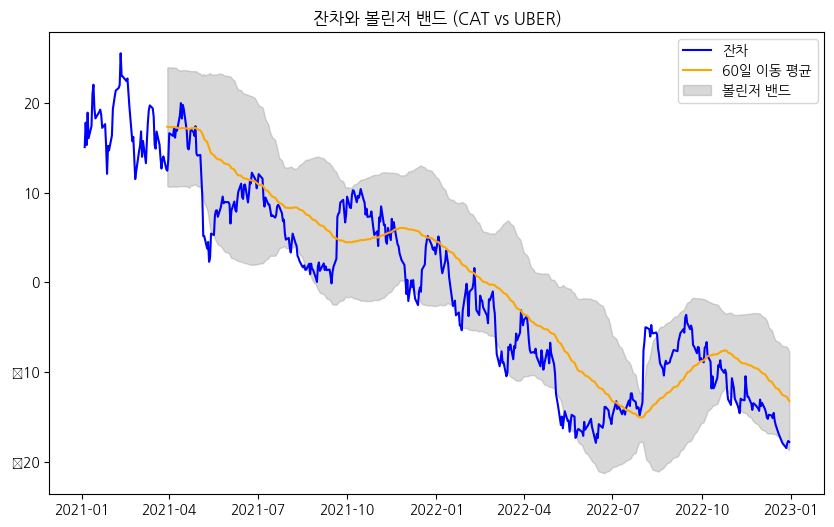


Analyzing Pair: RTX and UBER


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


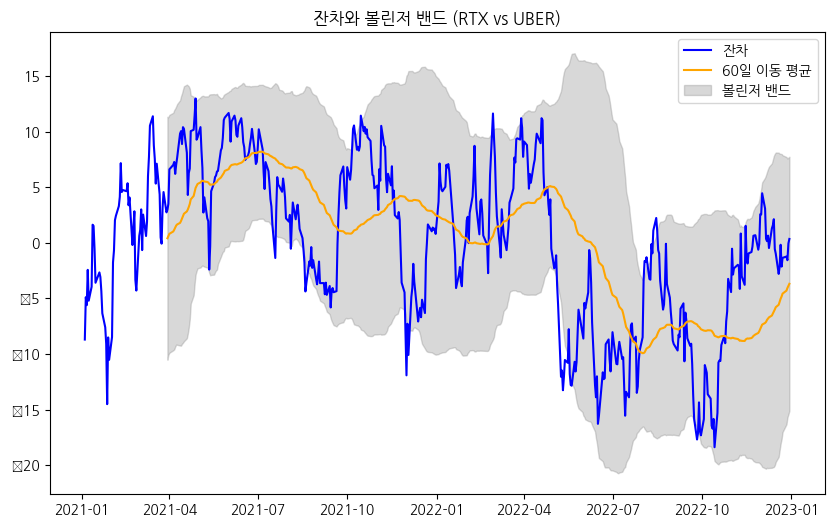

In [78]:
# 8. Industrials 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Industrials']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers)

In [79]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.05:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Industrials 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Industrials']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: GE and CAT - 잔차 표준편차: 15.418042050701299, ADF p-value: 0.231672082232671
Pair: GE and RTX - 잔차 표준편차: 7.807734175665015, ADF p-value: 0.05615229948939831
Pair: GE and UBER - 잔차 표준편차: 6.844971529149186, ADF p-value: 0.03310950032944831
Pair: CAT and RTX - 잔차 표준편차: 8.147641588720365, ADF p-value: 0.3626497894590477
Pair: CAT and UBER - 잔차 표준편차: 11.19315033346328, ADF p-value: 0.6928641201874739
Pair: RTX and UBER - 잔차 표준편차: 7.218836802087984, ADF p-value: 0.010105931606626902
가장 안정적인 페어: ('GE', 'UBER')


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: LIN and SHW


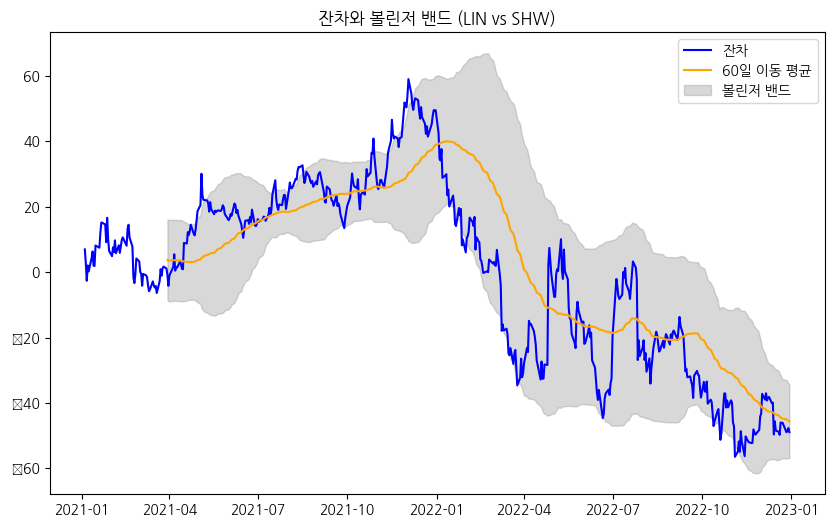


Analyzing Pair: LIN and ECL


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


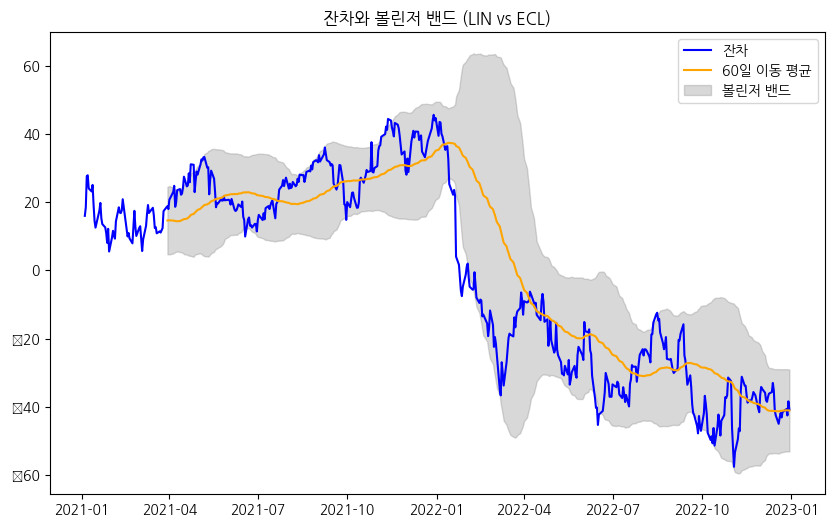


Analyzing Pair: LIN and FCX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


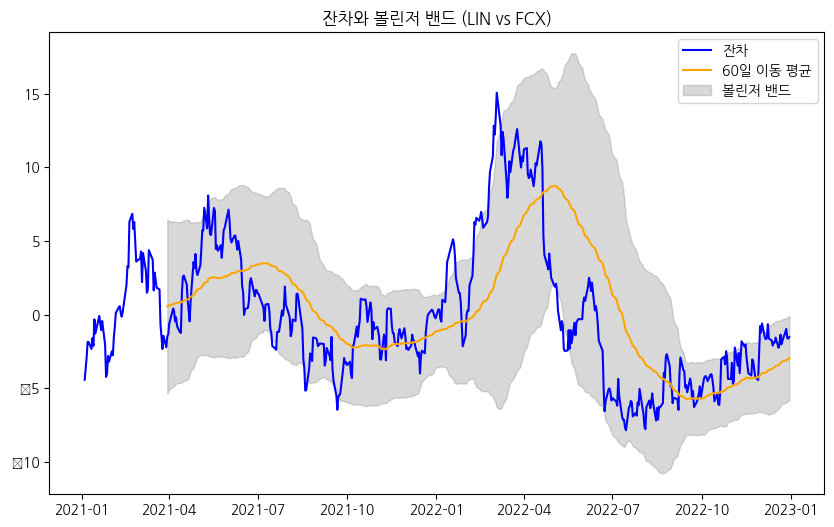


Analyzing Pair: SHW and ECL


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


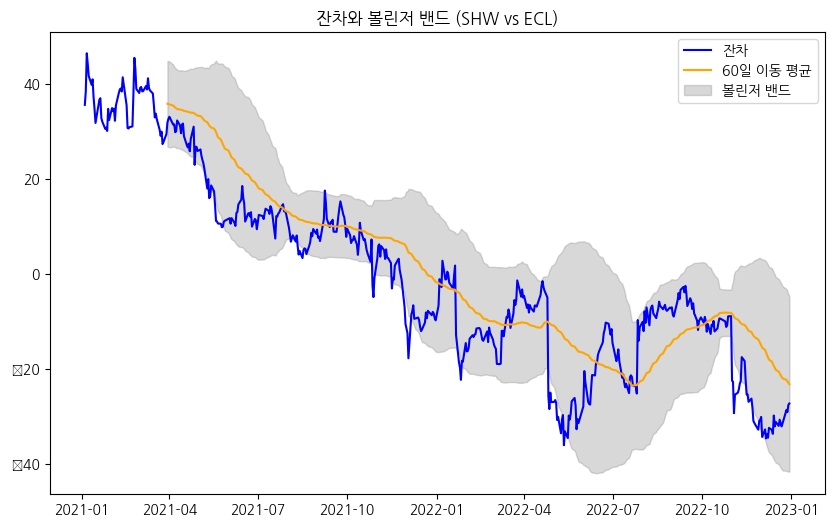


Analyzing Pair: SHW and FCX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


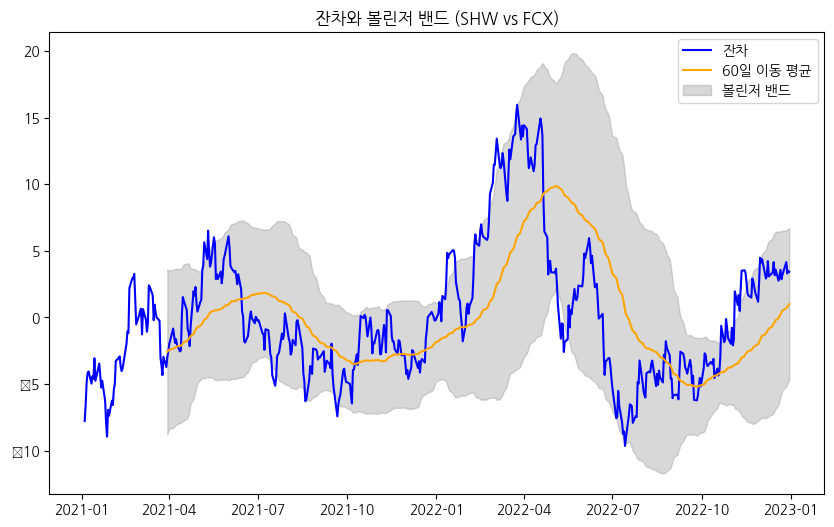


Analyzing Pair: ECL and FCX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


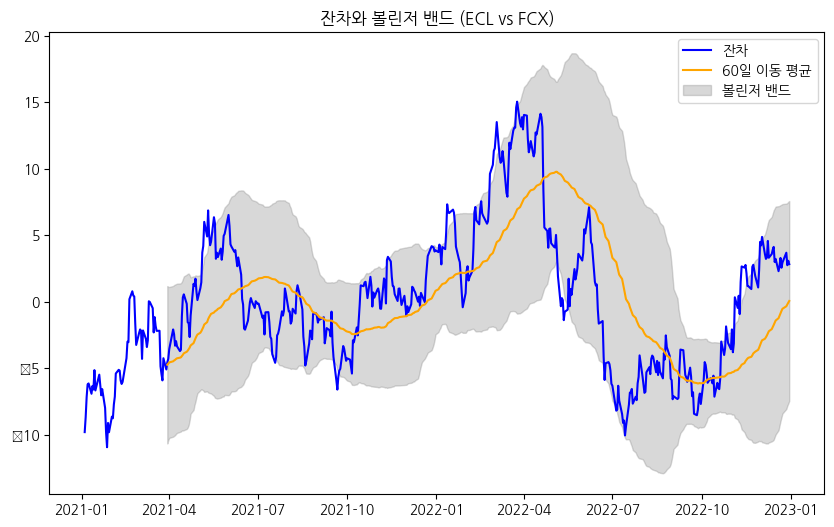

In [80]:
# 9. Materials 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Materials']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers)

In [88]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.1:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Materials 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Materials']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: LIN and SHW - 잔차 표준편차: 27.4652685845318, ADF p-value: 0.6720783065204585
Pair: LIN and ECL - 잔차 표준편차: 28.443073775627983, ADF p-value: 0.7518204943371634
Pair: LIN and FCX - 잔차 표준편차: 4.631369853829251, ADF p-value: 0.11764645655157807
Pair: SHW and ECL - 잔차 표준편차: 20.240695490273218, ADF p-value: 0.42378944477562125
Pair: SHW and FCX - 잔차 표준편차: 4.9900561869078865, ADF p-value: 0.07528859101671019
Pair: ECL and FCX - 잔차 표준편차: 5.331576959386008, ADF p-value: 0.07806003285387789
가장 안정적인 페어: ('SHW', 'FCX')


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: PLD and AMT


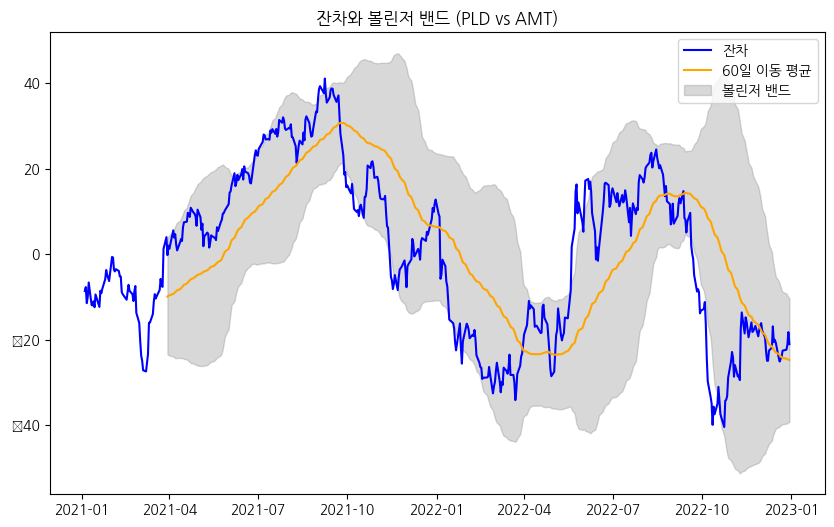


Analyzing Pair: PLD and EQIX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


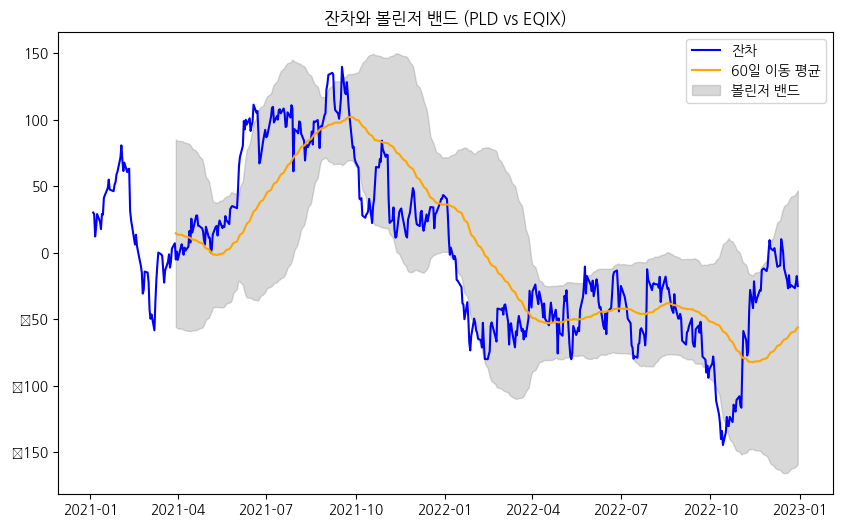


Analyzing Pair: PLD and WELL


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


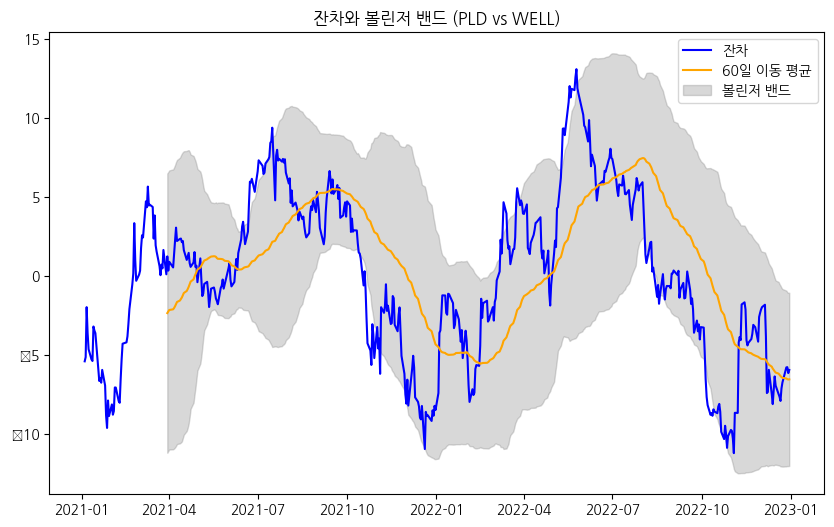


Analyzing Pair: AMT and EQIX


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


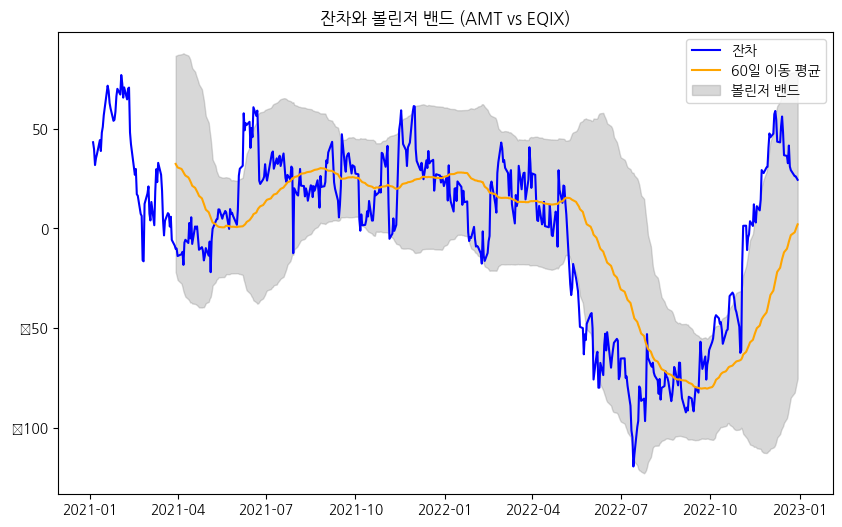


Analyzing Pair: AMT and WELL


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


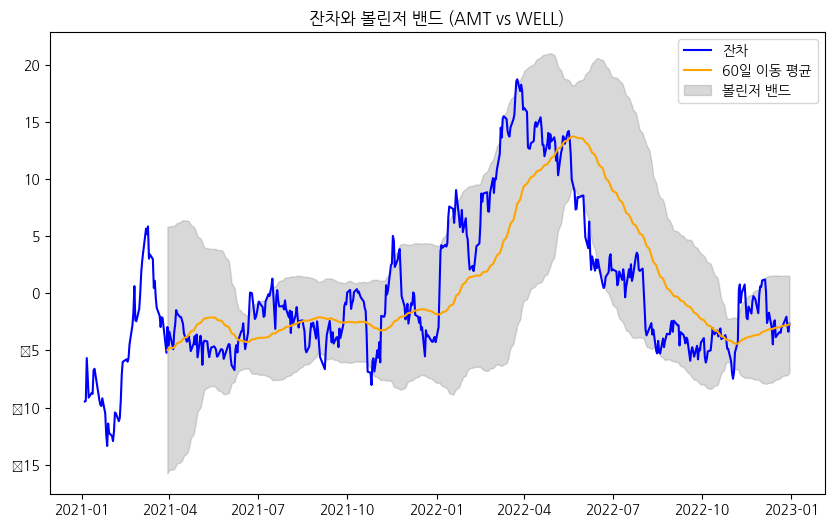


Analyzing Pair: EQIX and WELL


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


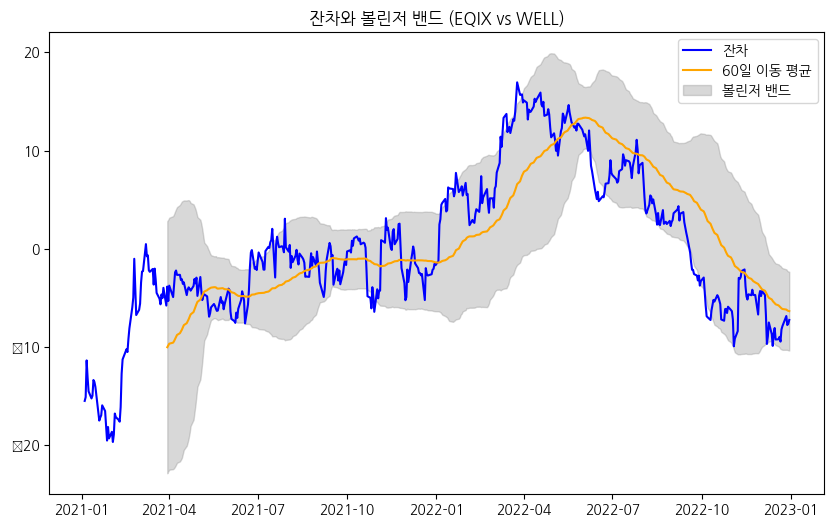

In [82]:
# 10. Real Estate 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Real Estate']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers)

In [89]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.1:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Real Estate 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Real Estate']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed


Pair: PLD and AMT - 잔차 표준편차: 19.29016304085945, ADF p-value: 0.48181901062280125
Pair: PLD and EQIX - 잔차 표준편차: 61.49402281002691, ADF p-value: 0.33589434025102133
Pair: PLD and WELL - 잔차 표준편차: 5.246252068213598, ADF p-value: 0.18008502213580518
Pair: AMT and EQIX - 잔차 표준편차: 42.58297271916545, ADF p-value: 0.23319664302692633
Pair: AMT and WELL - 잔차 표준편차: 6.4225321678066996, ADF p-value: 0.17243012748570857
Pair: EQIX and WELL - 잔차 표준편차: 7.562465282981238, ADF p-value: 0.21471286432507825
가장 안정적인 페어: None


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)



Analyzing Pair: NEE and SO


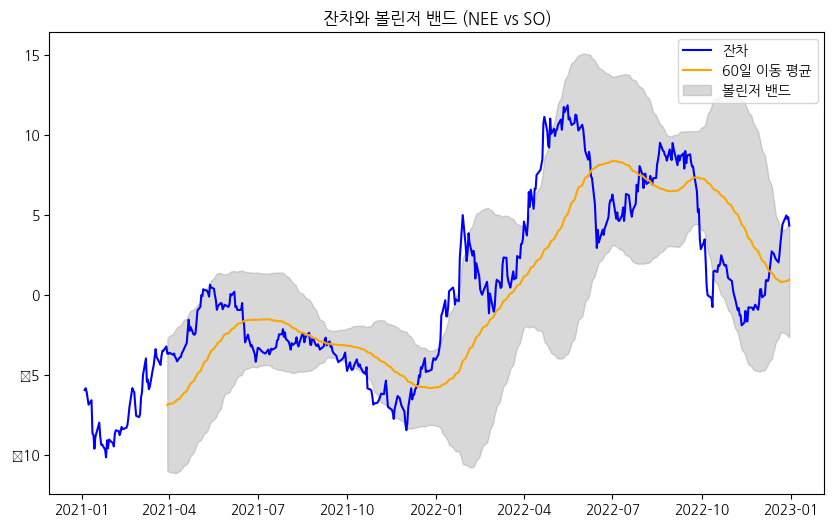


Analyzing Pair: NEE and DUK


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


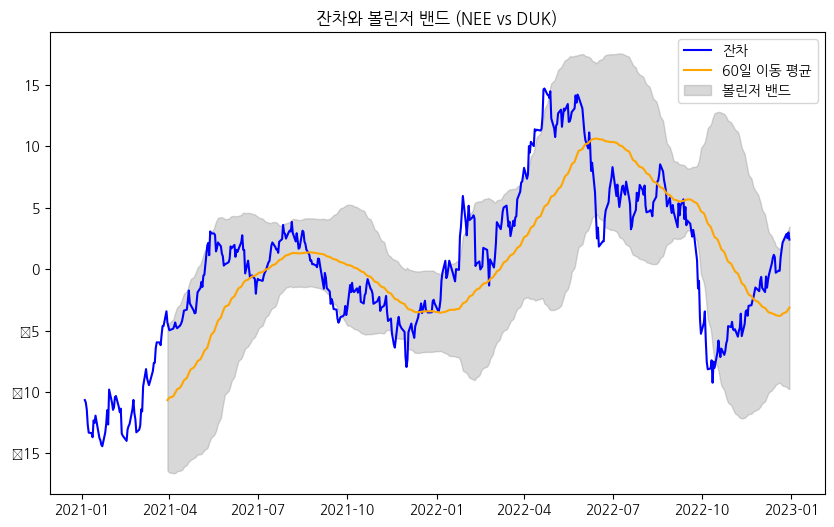


Analyzing Pair: NEE and CEG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


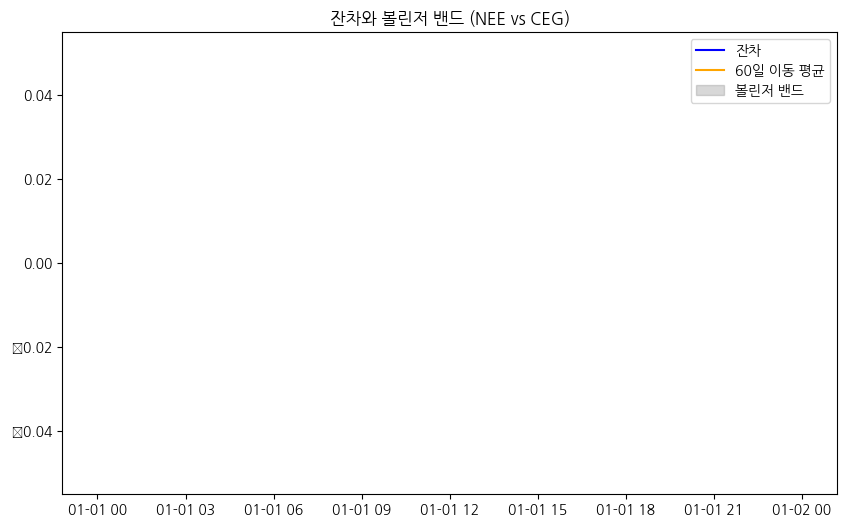


Analyzing Pair: SO and DUK


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


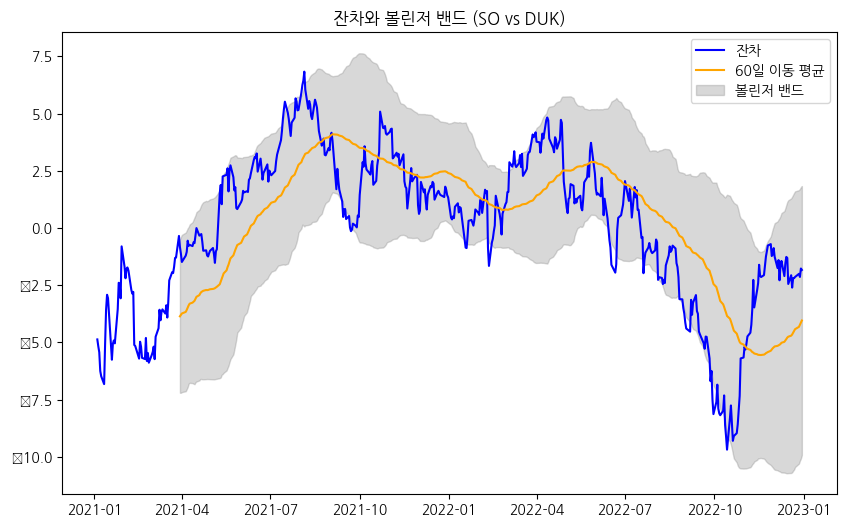


Analyzing Pair: SO and CEG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


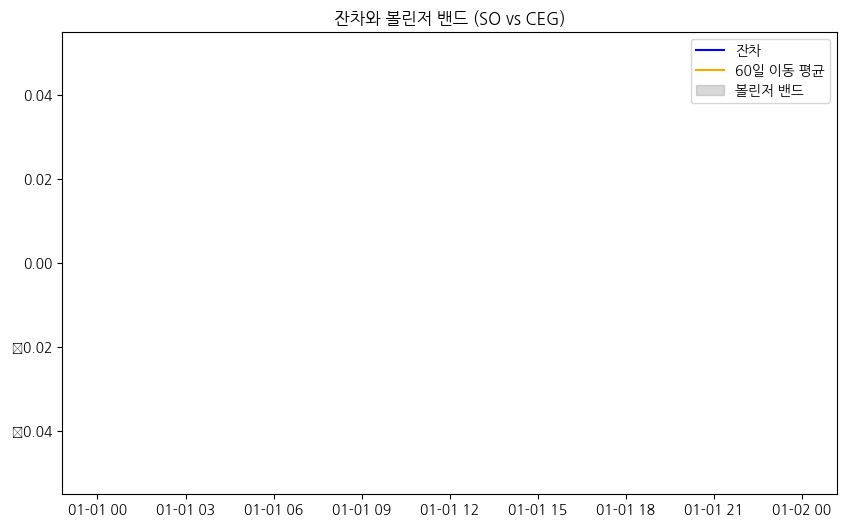


Analyzing Pair: DUK and CEG


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


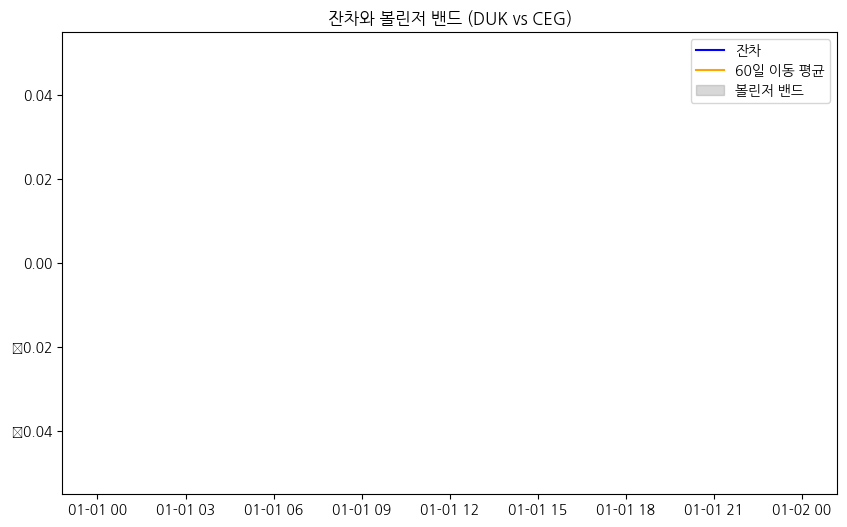

In [84]:
# 11. Utilities 섹터의 모든 페어 분석

financials_tickers = top_by_sector.loc['Utilities']['Symbol'].tolist()
analyze_sector_pairs(financials_tickers)

In [85]:
from statsmodels.tsa.stattools import adfuller

def select_stable_pair(sector_tickers, start_date="2021-01-01", end_date="2023-01-01"):
    data = get_sector_data(sector_tickers, start_date=start_date, end_date=end_date)
    pairs = list(itertools.combinations(sector_tickers, 2))

    stable_pair = None
    lowest_std = float('inf')  # 최소 표준편차를 가진 페어를 선택하기 위한 변수

    for pair in pairs:
        x_ticker, y_ticker = pair
        x = data[x_ticker]
        y = data[y_ticker]

        # OLS 회귀 분석 및 잔차 계산
        x = sm.add_constant(x)
        ols_model = sm.OLS(y, x).fit()
        residuals = ols_model.resid

        # 잔차의 표준편차 계산
        residual_std = residuals.std()

        # 잔차가 평균 회귀적 성향을 보이는지 ADF 테스트로 확인
        adf_result = adfuller(residuals)

        print(f"Pair: {x_ticker} and {y_ticker} - 잔차 표준편차: {residual_std}, ADF p-value: {adf_result[1]}")

        # 표준편차가 가장 낮고, ADF 테스트에서 평균회귀가 나타나는 페어 선택
        if residual_std < lowest_std and adf_result[1] < 0.05:
            stable_pair = (x_ticker, y_ticker)
            lowest_std = residual_std

    return stable_pair

# Utilities 섹터의 가장 안정적인 페어 선택
it_sector_tickers = top_by_sector.loc['Utilities']['Symbol'].tolist()
stable_it_pair = select_stable_pair(it_sector_tickers)
print(f"가장 안정적인 페어: {stable_it_pair}")


[*********************100%***********************]  4 of 4 completed

Pair: NEE and SO - 잔차 표준편차: 5.437166641532221, ADF p-value: 0.5996568084631945
Pair: NEE and DUK - 잔차 표준편차: 6.346219573663621, ADF p-value: 0.2879405631171187


MissingDataError: exog contains inf or nans